In [2]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Eric Meinhardt / emeinhardt@ucsd.edu**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Processing-steps" data-toc-modified-id="Processing-steps-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Processing steps</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outputs</a></span></li></ul></li><li><span><a href="#Imports-/-loading-data" data-toc-modified-id="Imports-/-loading-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports / loading data</a></span><ul class="toc-item"><li><span><a href="#More-code-for-interfacing-with-Buckeye" data-toc-modified-id="More-code-for-interfacing-with-Buckeye-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>More code for interfacing with Buckeye</a></span></li></ul></li><li><span><a href="#Seyfarth's-utterance-segmentation" data-toc-modified-id="Seyfarth's-utterance-segmentation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seyfarth's utterance segmentation</a></span><ul class="toc-item"><li><span><a href="#Segmentation-using-the-utterance-container" data-toc-modified-id="Segmentation-using-the-utterance-container-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Segmentation using the <code>utterance</code> container</a></span></li><li><span><a href="#Making-an-utterance-relation" data-toc-modified-id="Making-an-utterance-relation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Making an utterance relation</a></span></li><li><span><a href="#Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file" data-toc-modified-id="Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Write utterance relation, vocabulary and simple utterance list to file</a></span><ul class="toc-item"><li><span><a href="#Utterance-relation" data-toc-modified-id="Utterance-relation-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Utterance relation</a></span></li><li><span><a href="#(Orthographic)-Vocabulary" data-toc-modified-id="(Orthographic)-Vocabulary-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>(Orthographic) Vocabulary</a></span></li><li><span><a href="#Simple-utterance-list" data-toc-modified-id="Simple-utterance-list-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Simple utterance list</a></span></li></ul></li><li><span><a href="#Utterance-statistics" data-toc-modified-id="Utterance-statistics-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Utterance statistics</a></span></li></ul></li><li><span><a href="#Comparison-with-Fisher" data-toc-modified-id="Comparison-with-Fisher-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison with Fisher</a></span></li><li><span><a href="#Speaker-statistics" data-toc-modified-id="Speaker-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Speaker statistics</a></span></li><li><span><a href="#Making-a-word-relation-for-confusability-analysis" data-toc-modified-id="Making-a-word-relation-for-confusability-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Making a word relation for confusability analysis</a></span><ul class="toc-item"><li><span><a href="#Write-to-file" data-toc-modified-id="Write-to-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Write to file</a></span></li><li><span><a href="#Orthographic-segmental-transcription-relation" data-toc-modified-id="Orthographic-segmental-transcription-relation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Orthographic-segmental transcription relation</a></span><ul class="toc-item"><li><span><a href="#Write-to-file..." data-toc-modified-id="Write-to-file...-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Write to file...</a></span></li></ul></li></ul></li><li><span><a href="#Word-type-statistics" data-toc-modified-id="Word-type-statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Word type statistics</a></span></li><li><span><a href="#Applying-exclusion-criteria-to-the-word-relation" data-toc-modified-id="Applying-exclusion-criteria-to-the-word-relation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Applying exclusion criteria to the word relation</a></span><ul class="toc-item"><li><span><a href="#Write-to-file..." data-toc-modified-id="Write-to-file...-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Write to file...</a></span><ul class="toc-item"><li><span><a href="#One-sided-n-gram-contexts" data-toc-modified-id="One-sided-n-gram-contexts-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>One sided n-gram contexts</a></span></li><li><span><a href="#Bidirectional-contexts" data-toc-modified-id="Bidirectional-contexts-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Bidirectional contexts</a></span></li></ul></li></ul></li></ul></div>

# Overview

The goal of this notebook is to produce (/document the production of) a representation of Buckeye corpus data whose vocabulary has been normalized with respect to the Fisher corpus and where utterance segmentation has been performed. The motivation for doing this is applying a language model trained on (a slightly processed version of) the Fisher corpus to Buckeye.

## Processing steps

To that end, 
 1. A smattering of orthographic wordforms and transcriptions are aligned and/or corrected per the other notebook in this repository (`Converting Buckeye Transcriptions to Unicode IPA symbols`).
 2. Utterances are segmented per Seyfarth (2014) / his `buckeye` package.
 3. Non-speech noises are removed from utterances:
  - `'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'` are removed from the orthographic representation that is the input to a language model.
  - All other word-level containers that are not words (i.e. are `Pause` objects in `buckeye`) are indicated with `<rem>` in the orthographic representation that is the input to a language model.
 4. All orthographic characters are lower-cased.

## Dependencies

 - A local copy of the Buckeye corpus data.
 - The `buckeye` python package.
 
 
 - `funcy`
 - `pandas`
 - `plotnine`

## Outputs

If run successfully, this notebook will create the following files as outputs:
 1. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing an utterance (and associated metadata) in the Buckeye corpus.
 2. A .txt file containing one utterance from Buckeye per line, suitable for use with a language model.
 3. A .txt file containing the vocabulary (one wordform per line) of the previous file.
 4. Four .txt files containing every unigram, bigram, trigram, and 4-gram (respectively) context in file #2.
 5. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing a wordform token (and associated metadata) in the Buckeye corpus.
 6. A JSON file containing information (viz. including speech rate statistics) about speakers in the corpus.
 7. A JSON file containing information (viz. including duration statistics) about word types in the corpus.

# Imports / loading data

In [3]:
from collections import OrderedDict

In [4]:
import os
import csv
import json

In [5]:
buckeye_dir = '/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [6]:
#only useful/interesting if you want to do comparisons with the fisher corpus..
fisher_repo_dir = '/mnt/cube/home/AD/emeinhar/fisher-lm'

In [7]:
os.getcwd()
repo_dir = "/mnt/cube/home/AD/emeinhar/buckeye-lm"

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

In [8]:
main_project_dir = "/mnt/cube/home/AD/emeinhar/wr"
os.chdir(main_project_dir)
from boilerplate import *

In [9]:
os.chdir(repo_dir)

In [10]:
def dictionary_product(dictA, dictB):
    '''
    Given two dictionaries dictA and dictB, this non-statefully 
    creates a 'merged' dictionary.
    
    Note that dictA and dictB must either have disjoint keys,
    or every key they share must map to the same value.
    '''
    keys_A = dictA.keys()
    keys_B = dictB.keys()
    common_keys = set(keys_A) & set(keys_B)
    conflicting_common_keys = {k for k in common_keys if dictA[k] != dictB[k]}
    assert conflicting_common_keys == set(), 'The dictionaries must have either zero common keys, or all common keys must map to the same value. Conflicting common keys: {0}'.format(conflicting_common_keys)
#     assert common_keys == set(), 'The dictionaries must have no common keys. They share {0}'.format(common_keys)
    
    dictC = dict()
    dictC.update({k:dictA[k] for k in keys_A})
    dictC.update({k:dictB[k] for k in keys_B})
    return dictC

dict_prod = lambda Ds: reduce(dictionary_product, Ds)

In [11]:
# see https://github.com/scjs/buckeye 
import buckeye as b

In [12]:
import pandas as pd
from plotnine import *

In [13]:
from itertools import chain, starmap
from collections import Counter

## More code for interfacing with Buckeye

In [14]:
nonwords_to_filter_out = {'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'}

def isPauseOrDisfluency(container):
    return not isWord(container)
#     if type(container) == b.containers.Word:
#         return False
#     return True

def get_orthography_REM_sensitive(container):
#     if type(container) == b.containers.Word:
#         if container.orthography == 'dont':
#             return "don't"
#         return container.orthography
    if isWord(container):
        return get_orthography(container)
    if container.entry in nonwords_to_filter_out:
        return ''
    return '<rem>'

filledPauses = {
 'ah',
 'hm',
 'hmm',
#  'huh',
#  'huh-uh',
#  'hum',
#  'hum-um',
#  'mm',
#  'mm-hmm',
 'uh',
#  'uh-huh',
#  'uh-hum',
#  'uh-uh',
 'um',
#  'um-hmm',
#  'um-huh',
#  'um-hum'
}

def isFilledPause(word):
    return get_orthography(word) in filledPauses

In [15]:
def isWord(container):
    return type(container) == b.containers.Word

def getWords(track):
    return [w for w in track.words if isWord(w)]
#     return filter(isWord, track.words)

In [16]:
buckeyeUnicodeIPArelation = {
 ('a', 'ʌ'),
 ('aa', 'ɑ'),
 ('aan', 'ɑ̃'),
 ('ae', 'æ'),
 ('aen', 'æ̃'),
 ('ah', 'ʌ'),
 ('ahn', 'ʌ̃'),
 ('an', 'ʌ̃'),
 ('ao', 'ɔ'),
 ('aon', 'ɔ̃'),
 ('aw', 'aʊ'),
 ('awn', 'ãʊ̃'),
 ('ay', 'aɪ'),
 ('ayn', 'ãɪ̃'),
 ('b', 'b'),
 ('ch', 'tʃ'),
 ('d', 'd'),
 ('dh', 'ð'),
 ('dx', 'ɾ'),
 ('eh', 'ɛ'),
 ('ehn', 'ɛ̃'),
 ('el', 'l̩'),
 ('em', 'm̩'),
 ('en', 'n̩'),
 ('eng', 'ŋ̩'),
 ('er', 'ɚ'),
 ('ern', 'ɚ̃'),
 ('ey', 'eɪ'),
 ('eyn', 'ẽɪ̃'),
 ('f', 'f'),
 ('g', 'g'),
 ('h', 'h'),
 ('hh', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('ih', 'ɪ'),
 ('ihn', 'ɪ̃'),
 ('iy', 'i'),
 ('iyih', 'ĩ'),
 ('iyn', 'ĩ'),
 ('jh', 'dʒ'),
 ('k', 'k'),
 ('l', 'l'),
 ('m', 'm'),
 ('n', 'n'),
 ('ng', 'ŋ'),
 ('nx', 'ɾ̃'),
 ('ow', 'oʊ'),
 ('own', 'õʊ̃'),
 ('oy', 'ɔɪ'),
 ('oyn', 'ɔ̃ɪ̃'),
 ('p', 'p'),
 ('q', 'ʔ'),
 ('r', 'ɹ'),
 ('s', 's'),
 ('sh', 'ʃ'),
 ('t', 't'),
 ('th', 'θ'),
 ('tq', 'ʔ'),
 ('uh', 'ʊ'),
 ('uhn', 'ʊ̃'),
 ('uw', 'u'),
 ('uwix', 'u'),
 ('uwn', 'ũ'),
 ('v', 'v'),
 ('w', 'w'),
 ('y', 'j'),
 ('z', 'z'),
 ('zh', 'ʒ')}

def buckeyeToUnicodeIPA(buckeyeSymbol):
    mapping = dict(buckeyeUnicodeIPArelation)
    #print(mapping)
    return mapping[buckeyeSymbol]

In [17]:
from funcy import compose

def get_orthography(word):
    if word.orthography == 'dont':
        return "don't"
    return word.orthography

def filter_x(segSeq):
    return tuple([seg for seg in segSeq if seg != 'x'])

def intercept(item_to_replace, replacement):
    def transform(el):
        if el == item_to_replace:
            return replacement
        return el
    return transform

def phonemic_vowel_fixer(word, phonemes_IPA):
    if word.orthography == 'uh' and word.phonemic == ['ah', 'ah']:
        return phonemes_IPA[0]
    elif word.orthography == 'o' and word.phonemic == ['ow', 'ow']:
#         print(phonemes_IPA[:1])
        return phonemes_IPA[:1]
    elif word.orthography == 'Ellimen':
        return ('ɛ', 'l', 'ʌ', 'm', 'ɛ', 'n')
    return phonemes_IPA

def phonemic_flap_fixer(word, phonemes_IPA):
    flap_to_d = {"skateboarding",
                 "yadda",
                 "shoulda",
                 "dont",
                 "doody"}
    flap_to_t = {"littlest",
                 "lotta",
                 "introvertal",
                 "shut-outs",
                 "disparity",
                 "exporting",
                 "out-r-inn",
                 "tattletale",
                 "ritalin"}
    replaceWithd = intercept('ɾ', 'd')
    replaceWitht = intercept('ɾ', 't')
    if word.orthography in flap_to_d:
        return tuple(map(replaceWithd, phonemes_IPA))
    elif word.orthography in flap_to_t:
        return tuple(map(replaceWitht, phonemes_IPA))
    else:
        return phonemes_IPA

def fix_phonemes(word, phonemes_IPA):
#     if word.orthography == 'dont' and word.phonemic[-1] == 'tq':
#             return phonemes_IPA[:-1] + ('t',)
    replaceʔ = intercept('ʔ', 't')
    replaceɔ = intercept('ɔ', 'ɑ')
    replaceɾ̃ = intercept('ɾ̃', 'n')
    replacer = compose(replaceʔ, replaceɔ, replaceɾ̃)
    new_phonemes = tuple(map(replacer, phonemes_IPA))
    new_phonemes = phonemic_flap_fixer(word, new_phonemes)
    new_phonemes = phonemic_vowel_fixer(word, new_phonemes)
    return new_phonemes

def get_phonemes(word, inIPA=True, asDottedString=True):
    phonemes = tuple(word.phonemic)
    if inIPA:
        phonemes = filter_x(phonemes)
        phonemes = tuple(map(buckeyeToUnicodeIPA,
                             phonemes))
        phonemes = fix_phonemes(word, phonemes)
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

non_speech_inventory = {'{B_TRANS}',
                        '{E_TRANS}',
                        '',
                        'IVER',
                        'LAUGH',
                        'NOISE',
                        'SIL',
                        'UNKNOWN',
                        'VOCNOISE'}

def id_nonspeech(phone):
    if phone in non_speech_inventory:
        return phone
    return buckeyeToUnicodeIPA(phone)

def get_phones(word, inIPA=True, asDottedString=True):
    if not isWord(word):
        return word.phonetic
    phones = tuple(word.phonetic)
    if inIPA:
        phones = filter_x(phones)
#         phones = tuple(map(buckeyeToUnicodeIPA,
#                            phones))
        phones = tuple(map(id_nonspeech,
                           phones))
    if asDottedString:
        return t2ds(phones)
    return phones

In [18]:
#vowels + syllabic nasals + syllabic liquids

print(b.containers.SYLLABIC)
print(len(b.containers.SYLLABIC))


{seg:buckeyeToUnicodeIPA(seg)
 for seg in b.containers.SYLLABIC}

len(set({seg:buckeyeToUnicodeIPA(seg)
 for seg in b.containers.SYLLABIC}.values()))

{'ay', 'ahn', 'ao', 'oy', 'uwn', 'aa', 'aon', 'ehn', 'uhn', 'eh', 'own', 'uw', 'ihn', 'eyn', 'aw', 'aan', 'iy', 'el', 'ow', 'ayn', 'iyn', 'eng', 'em', 'ey', 'uh', 'awn', 'oyn', 'ah', 'er', 'ae', 'en', 'aen', 'ih'}
33


{'ay': 'aɪ',
 'ahn': 'ʌ̃',
 'ao': 'ɔ',
 'oy': 'ɔɪ',
 'uwn': 'ũ',
 'aa': 'ɑ',
 'aon': 'ɔ̃',
 'ehn': 'ɛ̃',
 'uhn': 'ʊ̃',
 'eh': 'ɛ',
 'own': 'õʊ̃',
 'uw': 'u',
 'ihn': 'ɪ̃',
 'eyn': 'ẽɪ̃',
 'aw': 'aʊ',
 'aan': 'ɑ̃',
 'iy': 'i',
 'el': 'l̩',
 'ow': 'oʊ',
 'ayn': 'ãɪ̃',
 'iyn': 'ĩ',
 'eng': 'ŋ̩',
 'em': 'm̩',
 'ey': 'eɪ',
 'uh': 'ʊ',
 'awn': 'ãʊ̃',
 'oyn': 'ɔ̃ɪ̃',
 'ah': 'ʌ',
 'er': 'ɚ',
 'ae': 'æ',
 'en': 'n̩',
 'aen': 'æ̃',
 'ih': 'ɪ'}

33

In [19]:
# buckeye_dir = '/mnt/cube/home/AD/emeinhar/buckeye-zips'
print(buckeye_dir)

/mnt/cube/home/AD/emeinhar/buckeye-zips


In [20]:
os.chdir(buckeye_dir)
os.getcwd()
print(os.listdir())

'/mnt/cube/home/AD/emeinhar/buckeye-zips'

['s05.zip', 's02.zip', 's39.zip', 's37.zip', 's30.zip', 's21.zip', 's26.zip', 's28.zip', 's31.zip', 's36.zip', 's38.zip', 's03.zip', 's04.zip', 's15.zip', 's12.zip', 's29.zip', 's27.zip', 's16.zip', 's18.zip', 's24.zip', 's35.zip', 's40.zip', 's09.zip', 's07.zip', 's19.zip', 's17.zip', 's10.zip', 's01.zip', 's06.zip', 's34.zip']


In [21]:
files = os.listdir()

In [22]:
speakers = [b.Speaker.from_zip(file) for file in files]
len(speakers)

30

In [23]:
tracks = list(union([set(s.tracks) for s in speakers]))
len(tracks)

193

In [24]:
s = speakers[0]
t = tracks[0]

In [25]:
def speaker_relation(s):
    r = {
    "speaker_age":s.age,
    "speaker_name":s.name,
    "speaker_interviewer":s.interviewer,
    "speaker_sex":s.sex
    }
    return r


def track_relation(s):
    return {"track_name":s.name}

In [26]:
w2 = t.words[2]; w2
# w2.entry

Word('uh', 0.643537, 1.053402, ['ah'], ['ah'], 'UH')

# Seyfarth's utterance segmentation

## Segmentation using the `utterance` container

In [27]:
def get_utterances(track):
    return [u for u in b.words_to_utterances(track.words)]

In [28]:
utterances = list(union([set(get_utterances(t)) for t in tracks]))
len(utterances)

18771

## Making an utterance relation

In [29]:
def getNonWords(utterance):
    non_words = [w for w in utterance.words if not isWord(w)]
    return non_words

def hasNonWords(utterance):
    nWs = getNonWords(utterance)
    if len(nWs) > 0:
        return True
    return False

In [30]:
utts_with_nonwords = [u for u in utterances if hasNonWords(u)]
len(utts_with_nonwords)

8497

In [31]:
nonwords = list(chain.from_iterable(map(getNonWords,
                                        utts_with_nonwords)))
len(nonwords)

20840

In [32]:
doNotReplaceWithREM = {'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'}
uninteresting_entries = {'<VOCNOISE>', '<SIL>','<IVER>','<UNKNOWN>', '<LAUGH>','<NOISE>','<ERROR>','{B_TRANS}','<CUTOFF>'}

In [33]:
interesting_nonwords = [nw for nw in nonwords if nw.entry not in uninteresting_entries and '=' not in nw.entry]
len(interesting_nonwords)

944

In [34]:
interesting_nonwords

[Pause('<NOISE-there>', 484.983013, 485.322137),
 Pause('<HES-uh>', 512.478409, 512.847588),
 Pause('<CUTOFF-I>', 165.259125, 165.387125),
 Pause('<HES-what>', 483.707257, 484.104),
 Pause('<CUTOFF-I>', 523.831881, 523.894777),
 Pause('<UNKNOWN-stuff?>', 145.346, 145.406),
 Pause('<EXCLUDE-name>', 269.061792, 269.407106),
 Pause('<HES-I>', 8.946087, 9.013841),
 Pause('<HES-do>', 26.962402, 27.142858),
 Pause('<EXT-I>', 34.253996, 34.599048),
 Pause('<LAUGH-that>', 327.390125, 327.583125),
 Pause('<LAUGH-kind>', 327.583125, 327.770125),
 Pause('<LAUGH-of>', 327.770125, 327.829125),
 Pause('<LAUGH-anyways>', 191.110062, 191.602794),
 Pause('<LAUGH-probably>', 192.340062, 192.640062),
 Pause('<LAUGH-off>', 195.194056, 195.56638),
 Pause('<LAUGH-list>', 350.731312, 351.205609),
 Pause('<VOCNOISE-uh>', 365.901138, 366.08739),
 Pause('<VOCNOISE-them>', 389.0864, 389.361072),
 Pause('<NOISE-paying>', 137.540057, 137.833682),
 Pause('<NOISE-both>', 315.958172, 316.188936),
 Pause('<UNKNOWN-thr

In [35]:
nonword_entry_types = set(map(lambda nw: nw.entry, interesting_nonwords))
len(nonword_entry_types)

574

In [36]:
nonword_entry_types

{'<CUTOFF-I>',
 '<CUTOFF-UNKNOWN>',
 '<CUTOFF-a a>',
 '<CUTOFF-a>',
 '<CUTOFF-always>',
 '<CUTOFF-carp+carpet>',
 '<CUTOFF-daughter>',
 '<CUTOFF-do>',
 '<CUTOFF-has>',
 "<CUTOFF-he's>",
 '<CUTOFF-he-here>',
 '<CUTOFF-i-it>',
 '<CUTOFF-in>',
 "<CUTOFF-it's>",
 '<CUTOFF-it>',
 '<CUTOFF-kids>',
 '<CUTOFF-match>',
 '<CUTOFF-never>',
 '<CUTOFF-see>',
 '<CUTOFF-sh-seen>',
 '<CUTOFF-spe-supposed>',
 '<CUTOFF-start>',
 '<CUTOFF-suppose>',
 '<CUTOFF-th-think>',
 '<CUTOFF-the-they>',
 '<CUTOFF-the>',
 '<CUTOFF-their>',
 '<CUTOFF-think?>',
 '<CUTOFF-thousand>',
 '<CUTOFF-to>',
 '<CUTOFF-w-want>',
 "<CUTOFF-w_won't>",
 '<CUTOFF-yi-you>',
 '<CUTOFF-yknow>',
 '<CUTOFF-you>',
 '<ERROR-?>',
 '<ERROR-thahab?>',
 "<ERROR-wasn't>",
 '<EXCLUDE-I>',
 '<EXCLUDE-at>',
 '<EXCLUDE-come>',
 '<EXCLUDE-is>',
 '<EXCLUDE-it>',
 "<EXCLUDE-let's>",
 '<EXCLUDE-name>',
 '<EXCLUDE-of>',
 '<EXCLUDE-oh>',
 '<EXCLUDE-one>',
 '<EXCLUDE-the>',
 '<EXCLUDE-yeah>',
 "<EXCLUDE-you're>",
 "<EXT-I'd>",
 '<EXT-I>',
 '<EXT-all>',
 '

In [37]:
nw = nonwords[0]; nw

Pause('<SIL>', 432.984636, 433.45992)

In [38]:
choice(nonwords).entry

'<VOCNOISE>'

To be able to (coarse-grainedly) compare utterance segmentation in Buckeye with segmentation in other speech corpora (e.g. Fisher), we want a sequence of orthographic words for each utterance, an utterance duration, and an utterance length.

In [39]:
# # utterances[0].words
# utterances[1].words
# vn = utterances[1].words[7]; vn
# vn.entry
# ' '.join(tuple(map(lambda w: get_orthography(w) if isWord(w) else w.entry, utterances[1].words)))

In [40]:
BOS = "<s>"
EOS = "<s>"
# EOS = "</s>"

In [42]:
def utterance_relation(utterance):
    speech_raw_l = []
    speech_l = []
    raw_to_processed = dict()
    for idx, w_raw in enumerate(utterance.words):
        raw_result = get_orthography(w_raw) if isWord(w_raw) else w_raw.entry
        speech_raw_l.append(raw_result)
        processed_result = get_orthography_REM_sensitive(w_raw).lower()
        if processed_result != '':
            speech_l.append(processed_result)
            raw_to_processed[idx] = len(speech_l)-1
        else:
            raw_to_processed[idx] = None
    speech_raw = ' '.join(speech_raw_l)
    speech = ' '.join(speech_l)
    
    assert len(speech_raw_l) == len(utterance.words)
    assert len(speech_l) == len(speech.split(' '))
    
#     speech_raw = ' '.join(tuple(map(lambda w: get_orthography(w) if isWord(w) else w.entry, utterance.words)))
##     words_noPausesOrDisfluencies = tuple(filter(isWord, utterance.words))
##     speech_words_noPausesOrDisfluencies = ' '.join(tuple(map(get_orthography, words_noPausesOrDisfluencies)))
#     speech_words = ' '.join([w for w in tuple(map(get_orthography_REM_sensitive, utterance.words))
#                              if w != ''])
#     speech = speech_words.lower()
    beg = utterance.beg
    end = utterance.end
    dur = utterance.dur
    speech_rate = utterance.speech_rate(ignore_missing_syllables=True) #syllables / s
    has_missing_syllables = any(map(lambda w: not hasattr(w, 'syllables'),
                                    utterance.words))
    r = {#'words':words_noPauses,
         'speech_raw':speech_raw,
         'speech':speech,
         'speech_padded':str_join(' ', [BOS, speech, EOS]),
         'raw_to_processed_idx_map':raw_to_processed,
         'beg':beg,
         'end':end,
         'dur':dur,
         'speech_rate':speech_rate,
         'has_missing_syllables':has_missing_syllables
         }
    return r

In [43]:
utterance_relation(utterances[0])

{'speech_raw': "that i've noticed now than",
 'speech': "that i've noticed now than",
 'speech_padded': "<s> that i've noticed now than <s>",
 'raw_to_processed_idx_map': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'beg': 427.601234,
 'end': 429.013561,
 'dur': 1.4123270000000048,
 'speech_rate': 4.248307934352299,
 'has_missing_syllables': False}

In [44]:
reduce(dictionary_product, [utterance_relation(utterances[0]), track_relation(t), speaker_relation(s)])

{'speech_raw': "that i've noticed now than",
 'speech': "that i've noticed now than",
 'speech_padded': "<s> that i've noticed now than <s>",
 'raw_to_processed_idx_map': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'beg': 427.601234,
 'end': 429.013561,
 'dur': 1.4123270000000048,
 'speech_rate': 4.248307934352299,
 'has_missing_syllables': False,
 'track_name': 's2801b',
 'speaker_age': 'o',
 'speaker_name': 's05',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f'}

In [45]:
buckeye_utterance_relation = [dict_prod([speaker_relation(s),
                                         track_relation(t),
                                         utterance_relation(u)])
                              for s in speakers for t in s.tracks for u in get_utterances(t)]
len(buckeye_utterance_relation)
buckeye_utterance_relation[:5]

18771

[{'speaker_age': 'o',
  'speaker_name': 's05',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'track_name': 's0501a',
  'speech_raw': 'i uh grew up in',
  'speech': 'i uh grew up in',
  'speech_padded': '<s> i uh grew up in <s>',
  'raw_to_processed_idx_map': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
  'beg': 40.384767,
  'end': 41.369375,
  'dur': 0.9846080000000015,
  'speech_rate': 5.078163086223139,
  'has_missing_syllables': False},
 {'speaker_age': 'o',
  'speaker_name': 's05',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'track_name': 's0501a',
  'speech_raw': 'is this is this',
  'speech': 'is this is this',
  'speech_padded': '<s> is this is this <s>',
  'raw_to_processed_idx_map': {0: 0, 1: 1, 2: 2, 3: 3},
  'beg': 42.087948,
  'end': 42.642588,
  'dur': 0.5546400000000062,
  'speech_rate': 7.211885186787745,
  'has_missing_syllables': False},
 {'speaker_age': 'o',
  'speaker_name': 's05',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'track_name': 's0501a',
  '

In [46]:
utts_w_missing_syllables = list(filter(lambda r: r['has_missing_syllables'],
                                       buckeye_utterance_relation))
len(utts_w_missing_syllables)

utts_w_missing_syllables[0]

8497

{'speaker_age': 'o',
 'speaker_name': 's05',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'track_name': 's0501a',
 'speech_raw': "because <SIL> it slipped <NOISE-since> <NOISE> i <IVER> since i set it <SIL> it's okay",
 'speech': "because it slipped <rem> i since i set it it's okay",
 'speech_padded': "<s> because it slipped <rem> i since i set it it's okay <s>",
 'raw_to_processed_idx_map': {0: 0,
  1: None,
  2: 1,
  3: 2,
  4: 3,
  5: None,
  6: 4,
  7: None,
  8: 5,
  9: 6,
  10: 7,
  11: 8,
  12: None,
  13: 9,
  14: 10},
 'beg': 43.148661,
 'end': 45.845388,
 'dur': 2.6967270000000028,
 'speech_rate': 3.7081988647719957,
 'has_missing_syllables': True}

## Write utterance relation, vocabulary and simple utterance list to file

 - For further processing, we'll write the utterance relation to file.
 - For further inspection of properties of utterances (shorn of other context) and to facilitate for use with kenlm, we'll write the bare list of utterances to file and the orthographic vocabulary to file.

### Utterance relation

In [47]:
os.chdir(repo_dir)
os.getcwd()

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

In [48]:
# import json

buckeye_utterances_relation_main_fn = 'buckeye_utterances_relation.json'

buckeye_utterances_relation_main_path = os.path.join(repo_dir, buckeye_utterances_relation_main_fn)

with open(buckeye_utterances_relation_main_path, 'w', encoding='utf8') as json_file:
    json.dump(buckeye_utterance_relation, json_file, indent=1, ensure_ascii=False, sort_keys=False)

In [49]:
%cat -n buckeye_utterances_relation.json | head -20

     1	[
     2	 {
     3	  "speaker_age": "o",
     4	  "speaker_name": "s05",
     5	  "speaker_interviewer": "f",
     6	  "speaker_sex": "f",
     7	  "track_name": "s0501a",
     8	  "speech_raw": "i uh grew up in",
     9	  "speech": "i uh grew up in",
    10	  "speech_padded": "<s> i uh grew up in <s>",
    11	  "raw_to_processed_idx_map": {
    12	   "0": 0,
    13	   "1": 1,
    14	   "2": 2,
    15	   "3": 3,
    16	   "4": 4
    17	  },
    18	  "beg": 40.384767,
    19	  "end": 41.369375,
    20	  "dur": 0.9846080000000015,
cat: write error: Broken pipe


### (Orthographic) Vocabulary

In [50]:
def word_types_in_utterance(u):
    return set(u['speech'].split(' '))

vocabulary_buckeye = union(map(word_types_in_utterance,
                               buckeye_utterance_relation))
len(vocabulary_buckeye)

7999

In [51]:
'' in vocabulary_buckeye #should be false

False

In [52]:
vocabulary_buckeye_alpha = sorted(list(vocabulary_buckeye))
vocabulary_buckeye_alpha[:10]

["'em",
 '<rem>',
 'a',
 "a's",
 "aaron's",
 'abandoned',
 'abercrombie',
 'abhorrent',
 'abide',
 'ability']

In [53]:
%%capture
#cell magic above suppresses useless output of file.write

vocabulary_buckeye_fn = 'buckeye_vocabulary.txt'

vocabulary_buckeye_fp = os.path.join(repo_dir, vocabulary_buckeye_fn)

with open(vocabulary_buckeye_fp, 'w') as file:
    for w in vocabulary_buckeye_alpha:
        file.write("{0}\n".format(w));

In [54]:
%cat -n buckeye_vocabulary.txt | head -20

     1	'em
     2	<rem>
     3	a
     4	a's
     5	aaron's
     6	abandoned
     7	abercrombie
     8	abhorrent
     9	abide
    10	ability
    11	able
    12	abortion
    13	abortions
    14	about
    15	above
    16	abraham
    17	abroad
    18	abrupt
    19	abruptly
    20	absence
cat: write error: Broken pipe


### Simple utterance list

In [55]:
simple_utts = [u['speech'] for u in buckeye_utterance_relation if u['speech'] != '']

In [56]:
simple_utts[:10]

['i uh grew up in',
 'is this is this',
 "because it slipped <rem> i since i set it it's okay",
 'um',
 'uh grew up in cincinnati',
 'i went to school',
 'at rhode island school of design',
 'went east to school um',
 'came back <rem> uh',
 'uh to uh got married and came back to']

In [57]:
len(simple_utts)

18771

In [58]:
%%capture
#cell magic above suppresses useless output of file.write

buckeye_utterances_fn = 'buckeye_utterances.txt'

buckeye_utterances_path = os.path.join(repo_dir, buckeye_utterances_fn)


with open(buckeye_utterances_path, 'w') as file:

    #write all lines at once using writelines and this takes <1s
    utterances_w_linebreaks = list(map(lambda l: l + "\n", simple_utts))
    file.writelines(utterances_w_linebreaks)
    
    #if someone else is using the machine heavily doing other things, this can take upwards of 2m
#     for utterance in utterances:
#         file.write("{0}\n".format(utterance));

In [59]:
%cat -n buckeye_utterances.txt | head -20

     1	i uh grew up in
     2	is this is this
     3	because it slipped <rem> i since i set it it's okay
     4	um
     5	uh grew up in cincinnati
     6	i went to school
     7	at rhode island school of design
     8	went east to school um
     9	came back <rem> uh
    10	uh to uh got married and came back to
    11	uh cleveland
    12	lived there for awhile met my husband hitchhiking back from <rem> one year
    13	ah
    14	ah then when he went to graduate school in columbus i came down here and
    15	don't have mister stergle with us anymore but um
    16	i stuck
    17	since seventy
    18	yeah
    19	i like it a lot
    20	uh
cat: write error: Broken pipe


## Utterance statistics

To impressionistically compare utterance segmentation in Fisher and Switchboard, I've looked at the following questions for each of them:

What is the distribution over
 - time til onset of the next utterance (if available)
 - utterance duration in s
 - utterance duration in orthographic wordforms?
 
Because both Fisher and Switchboard are transcripts of telephone conversations, the first question is meaningful. The data in Buckeye, however, comes from transcriptions of interviews with each participant, and interviewer speech is not transcribed, so the only meaningful way the first question above could be examined in Buckeye is analyzing the time between onsets of utterances by the interviewee (in general or between interviewer discourse turns). Because it would be hard to compare that anyway, I'll just consider the second two measures.

In [60]:
utterance_durations = [utt['dur'] for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_durations)

18771

In [61]:
utterance_lengths = [len(utt['speech'].split(' ')) for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_lengths)

18771

In [62]:
durations_df = pd.DataFrame(list(map(lambda d: {"Duration":d},
                                     utterance_durations)))
lengths_df = pd.DataFrame(list(map(lambda d: {"Length":d},
                                   utterance_lengths)))

In [63]:
durations_df.sort_values(by='Duration', ascending=False)

,Duration
5688,40.642888
14896,39.203499
15157,35.082985
7229,31.944000
5653,31.652455
...,...
8849,0.061362
12866,0.059750
2407,0.058236
13800,0.057196


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 165'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


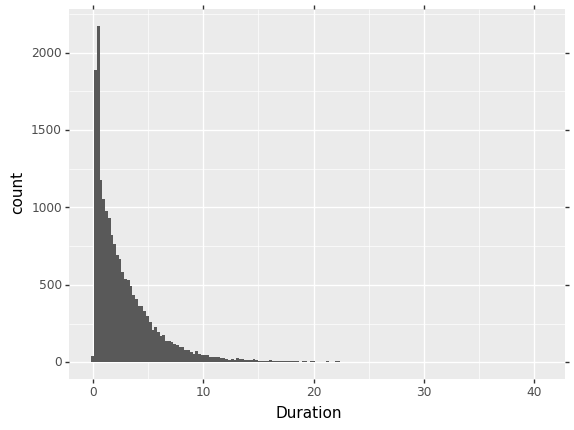

<ggplot: (8752520673033)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 88 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python

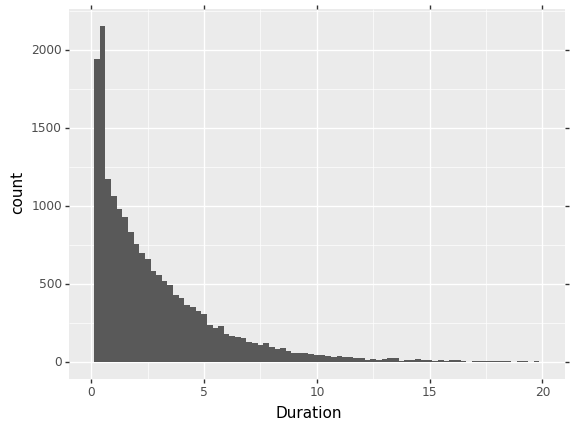

<ggplot: (8752598259037)>

In [64]:
ggplot(durations_df, aes(x="Duration")) + geom_histogram()
# ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot = ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot

In [65]:
lengths_df.sort_values(by='Length', ascending=False)

,Length
14896,196
800,155
15157,151
5688,148
14881,130
...,...
6467,1
14787,1
6463,1
6461,1


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 200'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


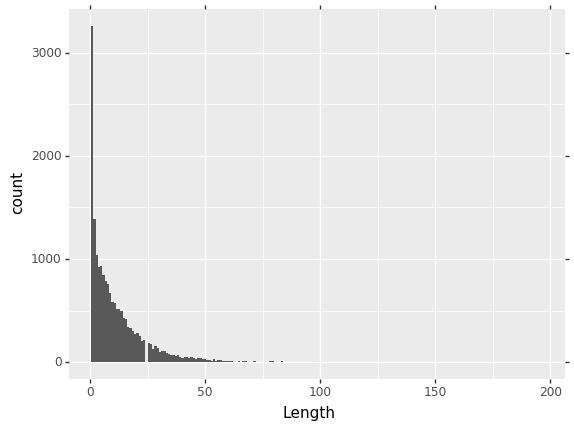

<ggplot: (8752520601653)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 61'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 233 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/pytho

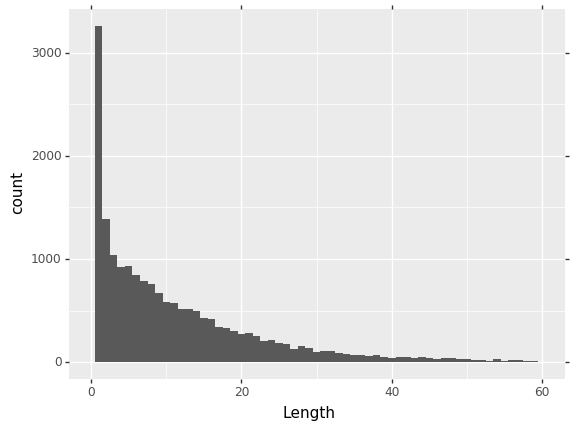

<ggplot: (8752520604469)>

In [66]:
ggplot(lengths_df, aes(x="Length")) + geom_histogram()
# ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot = ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot

# Comparison with Fisher

This assumes you have already conducted an analysis of the Fisher corpus...

In [67]:
# fisher_repo_dir = '/mnt/cube/home/AD/emeinhar/fisher-lm'
print(fisher_repo_dir)

/mnt/cube/home/AD/emeinhar/fisher-lm


In [68]:
os.chdir(fisher_repo_dir)

In [69]:
%ls *vocab*

fisher_vocabulary_bbn.txt  fisher_vocabulary_main.txt


In [70]:
%cat -n fisher_vocabulary_bbn.txt | head -20

     1	'and
     2	'berserkly'
     3	'bout
     4	'burb
     5	'burban
     6	'burbs
     7	'cau
     8	'cause
     9	'cept
    10	'cide
    11	'cisco
    12	'cize
    13	'course
    14	'cuse
    15	'do
    16	'em
    17	'em's
    18	'ems
    19	'everybody's
    20	'fess
cat: write error: Broken pipe


In [71]:
%cat -n fisher_vocabulary_main.txt | head -20

     1	'and
     2	'berserkly'
     3	'bout
     4	'burb
     5	'burban
     6	'burbs
     7	'cau
     8	'cause
     9	'cept
    10	'cide
    11	'cisco
    12	'cize
    13	'course
    14	'cuse
    15	'do
    16	'em
    17	'em's
    18	'ems
    19	'everybody's
    20	'fess
cat: write error: Broken pipe


In [72]:
fisher_vocab_bbn_fn = 'fisher_vocabulary_bbn.txt'
fisher_vocab_main_fn = 'fisher_vocabulary_main.txt'

In [73]:
fisher_vocab_bbn = []
with open(fisher_vocab_bbn_fn) as file:
    for line in file:
        fisher_vocab_bbn.append(line.rstrip())


fisher_vocab_main = []
with open(fisher_vocab_main_fn) as file:
    for line in file:
        fisher_vocab_main.append(line.rstrip())

In [74]:
len(fisher_vocab_bbn)
len(fisher_vocab_main)

42013

44064

In [75]:
fisher_vocab_bbn = set(fisher_vocab_bbn)
fisher_vocab_main = set(fisher_vocab_main)

In [76]:
def compare_sizes(before, after):
    print("{0} vs. {1}".format(len(before), len(after)))

In [77]:
def normalize_case(vocabulary):
    return set(map(lambda w: w.lower(),
                   vocabulary))

In [78]:
buckeye_vocab = vocabulary_buckeye
buckeye_vocab_lc = set(normalize_case(buckeye_vocab))
fisher_vocab_bbn_lc = set(normalize_case(fisher_vocab_bbn))
fisher_vocab_main_lc = set(normalize_case(fisher_vocab_main))

In [79]:
compare_sizes(buckeye_vocab, buckeye_vocab_lc)
compare_sizes(fisher_vocab_bbn, fisher_vocab_bbn_lc)
compare_sizes(fisher_vocab_main, fisher_vocab_main_lc)

7999 vs. 7999
42013 vs. 42013
44064 vs. 44064


In [80]:
vocab_unique_to_fisher = fisher_vocab_main_lc - buckeye_vocab_lc
len(vocab_unique_to_fisher)

36571

In [81]:
vocab_unique_to_buckeye = buckeye_vocab_lc - fisher_vocab_main_lc
len(vocab_unique_to_buckeye)

506

In [82]:
vocab_unique_to_buckeye

{'aderal',
 "adriatico's",
 'aeronautical',
 'ag',
 'agitation',
 'agler',
 'ails',
 'aline',
 'amazement',
 'ambulation',
 "amy's",
 'analyzes',
 "angela's",
 'angriest',
 'anorism',
 'apologetics',
 'apostolic',
 'appaling',
 'aroma',
 'arranges',
 'auditorially',
 'auditoriums',
 'automating',
 'autoworkers',
 'babysits',
 'backbeats',
 'backstreet',
 'backwater',
 'bainby',
 'ballplayer',
 'baptism',
 'barbarism',
 'bargained',
 'basslines',
 'beatitudes',
 'beechwold',
 'bellbottoms',
 'berth',
 'bethel',
 'bexley',
 'biff',
 'biggin',
 'bioinformatics',
 'blisters',
 'bloodpressure',
 'bons',
 'booklets',
 'borden',
 "borden's",
 'botany',
 'boxspring',
 'brailles',
 'brandenberg',
 'brink',
 'butterball',
 'byrds',
 'c.a.h.s.',
 'cahs',
 'canberra',
 'canvassing',
 'caregivers',
 'carryable',
 'cartoony',
 'carwash',
 'ccd',
 "center'd",
 'cesareans',
 'chants',
 'charleton',
 'chauvinist',
 'cheapskate',
 'check-up',
 'cheetohs',
 'chested',
 'chilicothe',
 'chillers',
 'chocol

In [83]:
buckeye_utterance_relation[0]

{'speaker_age': 'o',
 'speaker_name': 's05',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'track_name': 's0501a',
 'speech_raw': 'i uh grew up in',
 'speech': 'i uh grew up in',
 'speech_padded': '<s> i uh grew up in <s>',
 'raw_to_processed_idx_map': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'beg': 40.384767,
 'end': 41.369375,
 'dur': 0.9846080000000015,
 'speech_rate': 5.078163086223139,
 'has_missing_syllables': False}

In [84]:
def getWordTokens(utterance_rel):
    return tuple(utterance_rel['speech'].split(' '))

getWordTokens(buckeye_utterance_relation[0])

buckeye_word_tokens = tuple(chain.from_iterable(map(getWordTokens,
                                                    buckeye_utterance_relation)))
len(buckeye_word_tokens)

('i', 'uh', 'grew', 'up', 'in')

225669

In [85]:
buckeye_orth_freqs = Counter(buckeye_word_tokens)
buckeye_orth_freqs.most_common()

[('<rem>', 9607),
 ('i', 9418),
 ('and', 8227),
 ('the', 6204),
 ('to', 4889),
 ('a', 4549),
 ('that', 4275),
 ('it', 3520),
 ('like', 3504),
 ('you', 3475),
 ('of', 3091),
 ('yknow', 2847),
 ('they', 2835),
 ('in', 2580),
 ('uh', 2556),
 ("it's", 2292),
 ('but', 2248),
 ('was', 2227),
 ('so', 2035),
 ('yeah', 1994),
 ('just', 1979),
 ("don't", 1722),
 ('um', 1692),
 ('have', 1623),
 ('know', 1484),
 ('is', 1466),
 ('my', 1378),
 ('he', 1375),
 ('think', 1366),
 ('for', 1329),
 ('we', 1326),
 ('do', 1298),
 ('mean', 1214),
 ('or', 1178),
 ('there', 1173),
 ('be', 1159),
 ('on', 1149),
 ('not', 1148),
 ('with', 1136),
 ('because', 1122),
 ('really', 1107),
 ("that's", 1090),
 ('what', 1014),
 ('well', 1000),
 ('people', 985),
 ('if', 981),
 ("i'm", 940),
 ('at', 910),
 ('all', 908),
 ('this', 901),
 ('get', 877),
 ('go', 859),
 ('are', 850),
 ('about', 848),
 ('when', 835),
 ('them', 819),
 ('out', 795),
 ('she', 785),
 ('me', 760),
 ('then', 730),
 ('had', 730),
 ('as', 716),
 ('one', 

In [86]:
buckeye_unique_vocab_by_freq = Counter({w:buckeye_orth_freqs[w] for w in vocab_unique_to_buckeye})
buckeye_unique_vocab_by_freq.most_common()

[('yknow', 2847),
 ('hafta', 52),
 ('mm-hmm', 41),
 ('northland', 19),
 ('clintonville', 15),
 ('hum-um', 15),
 ('meijer', 9),
 ("u's", 9),
 ('olentangy', 7),
 ('grandview', 7),
 ('hilliard', 7),
 ('useta', 6),
 ('wexner', 5),
 ('cosi', 5),
 ('jansen', 4),
 ('bethel', 4),
 ('fatherly', 4),
 ('jalena', 4),
 ('sunbury', 3),
 ('pokedex', 3),
 ('scooney', 3),
 ('femalee', 3),
 ('developers', 3),
 ('tallow', 3),
 ('otterbein', 3),
 ('webbing', 3),
 ('steubenville', 3),
 ('cheapskate', 3),
 ('inalienable', 3),
 ('vestibules', 3),
 ('jedd', 3),
 ('kirkwood', 2),
 ('chauvinist', 2),
 ("emma's", 2),
 ('sermon', 2),
 ('tarzan', 2),
 ('anorism', 2),
 ('introvertal', 2),
 ('oxleys', 2),
 ('edventure', 2),
 ('jocks', 2),
 ('geezy', 2),
 ('out-r-inn', 2),
 ('comforters', 2),
 ('botany', 2),
 ('bloodpressure', 2),
 ('reload', 2),
 ('desalles', 2),
 ('wolff', 2),
 ('depreciate', 2),
 ('ural', 2),
 ('orangello', 2),
 ('vestibule', 2),
 ('paterno', 2),
 ('cuyahoga', 2),
 ('masillon', 2),
 ("doty's", 2),

There's nothing too concerning here...

# Speaker statistics

We want to know, for each speaker,
 - the speaker's distribution over utterance speech rates
 - the mean and (multiples of) the standard deviation

In [87]:
speaker_names = tuple(sorted(set(map(lambda bur: bur['speaker_name'], buckeye_utterance_relation))))
print(speaker_names)

('s01', 's02', 's03', 's04', 's05', 's06', 's07', 's09', 's10', 's12', 's15', 's16', 's17', 's18', 's19', 's21', 's24', 's26', 's27', 's28', 's29', 's30', 's31', 's34', 's35', 's36', 's37', 's38', 's39', 's40')


In [88]:
def get_speaker_utterances(speaker_name):
    return tuple([bur for bur in buckeye_utterance_relation if bur['speaker_name'] == speaker_name])

def get_speech_rates(speaker_name):
    my_utts = get_speaker_utterances(speaker_name)
    return {u['speech_rate'] for u in my_utts}

bur_s01 = get_speaker_utterances('s01')
len(bur_s01)
bur_s01[0]
tuple(get_speech_rates('s01'))[:10]

453

{'speaker_age': 'y',
 'speaker_name': 's01',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'track_name': 's0101a',
 'speech_raw': 'okay',
 'speech': 'okay',
 'speech_padded': '<s> okay <s>',
 'raw_to_processed_idx_map': {0: 0},
 'beg': 32.216575,
 'end': 32.622045,
 'dur': 0.4054700000000011,
 'speech_rate': 2.4662737070560024,
 'has_missing_syllables': False}

(0.0,
 1.961211165567458,
 2.2620084372914775,
 2.4662737070560024,
 4.452732981025359,
 5.2114182173141606,
 3.09622686054208,
 4.993007207319822,
 4.85607602348884,
 4.8562033461030225)

In [89]:
speech_rate_dl = [{'speaker_name':sn,
                    'speaker_id':int(sn[1:]),
                    'speaker_age':bur['speaker_age'],
                    'speaker_sex':bur['speaker_sex'],
                    'speaker_interviewer':bur['speaker_interviewer'],
                    'speech_rate':bur['speech_rate'],
                    'has_missing_syllables':bur['has_missing_syllables']}
                   for sn in speaker_names for bur in get_speaker_utterances(sn)]
speech_rate_df = pd.DataFrame(speech_rate_dl)
speech_rate_df.info()
speech_rate_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18771 entries, 0 to 18770
Data columns (total 7 columns):
speaker_name             18771 non-null object
speaker_id               18771 non-null int64
speaker_age              18771 non-null object
speaker_sex              18771 non-null object
speaker_interviewer      18771 non-null object
speech_rate              18771 non-null float64
has_missing_syllables    18771 non-null bool
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 898.3+ KB


,speaker_name,speaker_id,speaker_age,speaker_sex,speaker_interviewer,speech_rate,has_missing_syllables
0,s01,1,y,f,f,2.466274,False
1,s01,1,y,f,f,2.263747,True
2,s01,1,y,f,f,4.452733,True
3,s01,1,y,f,f,2.262008,False
4,s01,1,y,f,f,3.096227,False


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


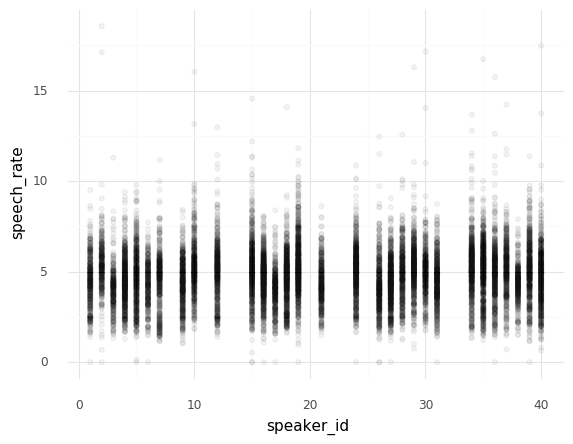

<ggplot: (8752519875301)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


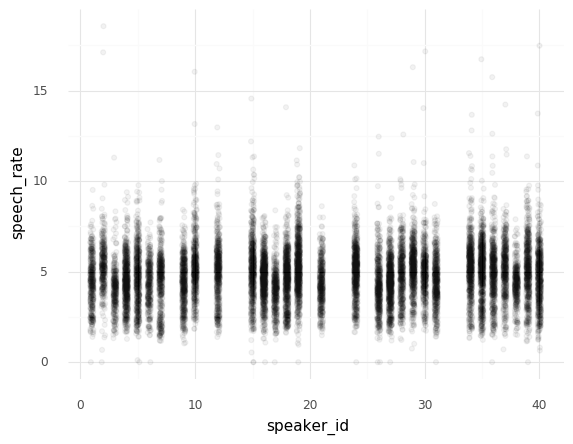

<ggplot: (8752517984573)>

In [90]:
ggplot(speech_rate_df, aes(x='speaker_id', y='speech_rate')) + geom_point(alpha=0.05) + theme_minimal()
ggplot(speech_rate_df, aes(x='speaker_id', y='speech_rate')) + geom_jitter(alpha=0.05, height=None, width=0.15) + theme_minimal()

In [91]:
speech_rate_df_grouped = speech_rate_df.groupby(['speaker_name', 'speaker_id'])
# speech_rate_df_grouped.head()
speech_rate_df_grouped_agged = speech_rate_df_grouped.agg(mean_sr=pd.NamedAgg(column='speech_rate', aggfunc='mean'),
                                                            var_sr=pd.NamedAgg(column='speech_rate', aggfunc='var'),
                                                            std_sr=pd.NamedAgg(column='speech_rate', aggfunc='std'))
# speech_rate_df_grouped_agged.head()
speech_rate_df_grouped_agged = speech_rate_df_grouped_agged.reset_index()
speech_rate_df_grouped_agged['2𝛔'] = 2 * speech_rate_df_grouped_agged['std_sr']
speech_rate_df_grouped_agged['2.5𝛔'] = 2.5 * speech_rate_df_grouped_agged['std_sr']
speech_rate_df_grouped_agged['3𝛔'] = 3 * speech_rate_df_grouped_agged['std_sr']
speech_rate_df_grouped_agged.head()

,speaker_name,speaker_id,mean_sr,var_sr,std_sr,2𝛔,2.5𝛔,3𝛔
0,s01,1,4.456794,1.876497,1.369853,2.739706,3.424632,4.109559
1,s02,2,5.352837,2.268633,1.506198,3.012397,3.765496,4.518595
2,s03,3,4.040721,1.352801,1.163100,2.326200,2.907750,3.489300
3,s04,4,4.466670,1.577802,1.256106,2.512212,3.140265,3.768318
4,s05,5,4.653717,2.428770,1.558451,3.116902,3.896128,4.675353


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


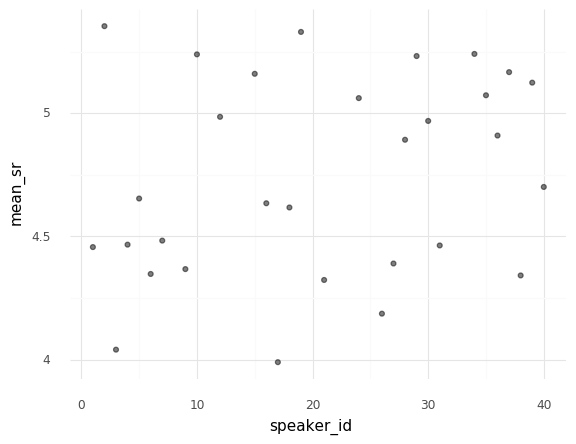

<ggplot: (8752520474557)>

In [92]:
ggplot(speech_rate_df_grouped_agged, aes(x='speaker_id', y='mean_sr')) + geom_point(alpha=0.5) + theme_minimal()

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


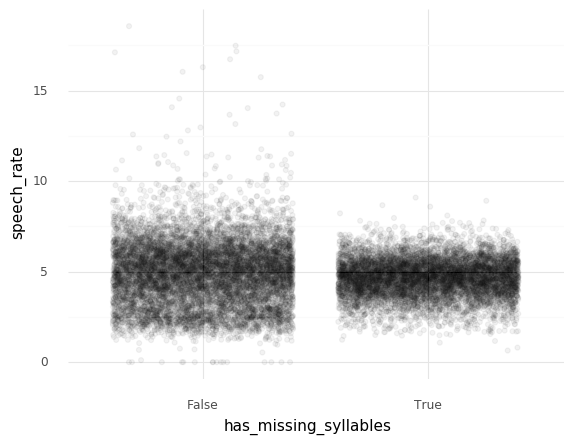

<ggplot: (8752518048125)>

In [93]:
# ggplot(speech_rate_df, aes(x='has_missing_syllables', y='speech_rate')) + geom_point(alpha=0.05) + theme_minimal()
ggplot(speech_rate_df, aes(x='has_missing_syllables', y='speech_rate')) + geom_jitter(alpha=0.05, height=None) + theme_minimal()

,speaker_name,speaker_id,speaker_age,speaker_sex,speaker_interviewer,speech_rate,has_missing_syllables
0,s01,1,y,f,f,2.466274,False
1,s01,1,y,f,f,2.263747,True
2,s01,1,y,f,f,4.452733,True
3,s01,1,y,f,f,2.262008,False
4,s01,1,y,f,f,3.096227,False


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


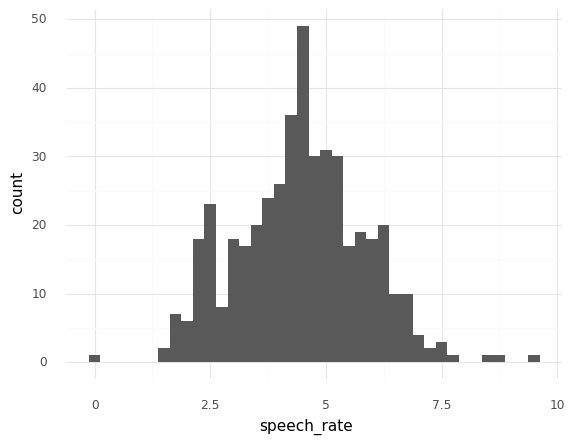

<ggplot: (8752518103121)>

In [94]:
s01speech_rate_df = speech_rate_df_grouped.get_group(('s01', 1))
s01speech_rate_df.head()
ggplot(s01speech_rate_df, aes(x='speech_rate')) + geom_histogram(binwidth=0.25) + theme_minimal()

In [95]:
# speech_rate_df_no_missing_sylls = speech_rate_df.loc[ speech_rate_df['has_missing_syllables'] == False ]
# speech_rate_df_no_missing_sylls.info()

# speech_rate_df_no_missing_sylls_grouped = speech_rate_df_no_missing_sylls.groupby(['speaker_name', 'speaker_id'])
# speech_rate_df_nms_grouped_agged = speech_rate_df_no_missing_sylls_grouped.agg(mean_sr=pd.NamedAgg(column='speech_rate', aggfunc='mean'),
#                                                             var_sr=pd.NamedAgg(column='speech_rate', aggfunc='var'),
#                                                             std_sr=pd.NamedAgg(column='speech_rate', aggfunc='std'))
# # speech_rate_df_grouped_agged.head()
# speech_rate_df_nms_grouped_agged = speech_rate_df_nms_grouped_agged.reset_index()
# speech_rate_df_nms_grouped_agged['2𝛔'] = 2 * speech_rate_df_nms_grouped_agged['std_sr']
# speech_rate_df_nms_grouped_agged['2.5𝛔'] = 2.5 * speech_rate_df_nms_grouped_agged['std_sr']
# speech_rate_df_nms_grouped_agged['3𝛔'] = 3 * speech_rate_df_nms_grouped_agged['std_sr']
# speech_rate_df_nms_grouped_agged.head()

In [96]:
# speech_rate_agg_info = speech_rate_df_nms_grouped_agged.to_dict()
speech_rate_agg_info = speech_rate_df_grouped_agged.to_dict()
set(speech_rate_agg_info.keys())
print(speech_rate_agg_info['speaker_id'])

{'2.5𝛔',
 '2𝛔',
 '3𝛔',
 'mean_sr',
 'speaker_id',
 'speaker_name',
 'std_sr',
 'var_sr'}

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 9, 8: 10, 9: 12, 10: 15, 11: 16, 12: 17, 13: 18, 14: 19, 15: 21, 16: 24, 17: 26, 18: 27, 19: 28, 20: 29, 21: 30, 22: 31, 23: 34, 24: 35, 25: 36, 26: 37, 27: 38, 28: 39, 29: 40}


In [97]:
num_rows = len(speech_rate_agg_info['speaker_id'])
speech_rate_info = [{k:speech_rate_agg_info[k][r]
                     for k in ('speaker_name', 'speaker_id', 'mean_sr', 'var_sr', 'std_sr', '2𝛔', '2.5𝛔', '3𝛔')}
                    for r in range(num_rows)]
speech_rate_info[0]

{'speaker_name': 's01',
 'speaker_id': 1,
 'mean_sr': 4.45679410043061,
 'var_sr': 1.8764969507731692,
 'std_sr': 1.3698528938441417,
 '2𝛔': 2.7397057876882833,
 '2.5𝛔': 3.424632234610354,
 '3𝛔': 4.109558681532425}

In [98]:
buckeye_speaker_info_fn = 'buckeye_speaker_info.json'

buckeye_speaker_info_path = os.path.join(repo_dir, buckeye_speaker_info_fn)

with open(buckeye_speaker_info_path, 'w', encoding='utf8') as json_file:
    json.dump(speech_rate_info, json_file, indent=1, ensure_ascii=False, sort_keys=False)

# Making a word relation for confusability analysis

In [99]:
buckeye_utterance_relation[0]

{'speaker_age': 'o',
 'speaker_name': 's05',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'track_name': 's0501a',
 'speech_raw': 'i uh grew up in',
 'speech': 'i uh grew up in',
 'speech_padded': '<s> i uh grew up in <s>',
 'raw_to_processed_idx_map': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'beg': 40.384767,
 'end': 41.369375,
 'dur': 0.9846080000000015,
 'speech_rate': 5.078163086223139,
 'has_missing_syllables': False}

For each speech word token in the corpus, we want
 - the (processed/normalized) orthographic wordform
 - the IPA phonemic transcription
 - the IPA phone transcription
 - whether the phone transcription contains any vowels or syllabic consonants
 - all preceding wordforms in the (processed) utterance
 - all following wordforms in the (processed) utterance
 - the (1,2,3,4) preceding orthographic wordforms in the (processed) utterance
 - the (1,2,3,4) following orthographic wordforms in the (processed) utterance
 - whether the word is adjacent to any disfluencies, pauses, or filled pauses
 - whether the word is utterance-initial or utterance-final
 - whether the word begins or ends with a clitic
 - the duration.
 
We also want 
 - the track and speaker track name
 - the speaker metadata (ID, age, and sex)
 - the interviewer metadata
 - some other metadata natively associated with words by `buckeye` (beginning, end, misaligned flag, POS, number of syllables).

In [100]:
from funcy import lconcat, lcat

In [101]:
words = lcat([u.words for u in utterances])
len(words)

236902

In [102]:
tagset = {w.pos for w in words if isWord(w)}
len(tagset)
print(tagset)

#tagset from appendix of "Buckeye Corpus Manual: 11/30/06"
# The Variation in Conversation (ViC) Project: Creation of the Buckeye Corpus of Conversational Speech 
# Kiesling, Dilley & Raymond 2006
kdr_tagset = {
'CC',
'CD',
'DT',
'EX',
'FW',
'IN',
'JJ',
'JJR',
'JJS',
'LS',
'MD',
'NN',
'NNS',
'NNP',
'NNPS',
'PDT',
'POS',
'PRP',
'PP$',
'RB',
'RBR',
'RBS',
'RP',
'SYM',
'TO',
'UH',
'VB',
'VBD',
'VBG',
'VBN',
'VBP',
'VBZ',
'WDT',
'WP',
'WP$',
'WRB',
'DT_VBZ',
'EX_VBZ',
'NULL',
'PRP_MD',
'PRP_VBP',
'PRP_VBZ',
'VBG_TO',
'VBP_RB',
'VBP_RB',
'VBP_TO',
'VBZ_RB',
'WP_VBZ',
'WP_RB'
}

tagset - kdr_tagset
kdr_tagset - tagset

45

{'RB', 'TO', 'NNPS', 'PRP_MD', 'CD', 'JJR', 'PDT', 'NNS', 'MD', 'VBP_TO', 'UH', 'VBP', 'FW', 'RBR', 'IN', 'PRP_VBZ', 'VBZ', 'RBS', 'WP', 'PRP_VBP', 'VBG', 'EX_VBZ', 'NNP', 'VBZ_RB', 'VBD', 'CC', 'SYM', 'WDT', 'PRP$', 'RP', 'VBN', 'MD_RB', 'WP_VBZ', 'PRP', 'VB', 'JJS', 'WRB', 'WP$', 'VBG_TO', 'DT', 'NN', 'VBP_RB', 'DT_VBZ', 'JJ', 'EX'}


{'MD_RB', 'PRP$'}

{'LS', 'NULL', 'POS', 'PP$', 'WP_RB'}

In [103]:
"yknow" in vocabulary_buckeye

True

In [104]:
clitic_suffixes = {"n't", "'ve", "'ll", "'s", "s'","'d", "'re", "'m", "'em", "'d've"}

In [105]:
words_with_clitic_suffix = {w for w in vocabulary_buckeye 
                            if any({suff in w for suff in clitic_suffixes})}
len(vocabulary_buckeye)
len(words_with_clitic_suffix)
len(words_with_clitic_suffix - {w for w in words_with_clitic_suffix
                                if "'s" in w})

7999

294

71

In [106]:
words_with_clitic_suffix - {w for w in words_with_clitic_suffix if "'s" in w}

{"'em",
 "ain't",
 "aren't",
 "can't",
 "center'd",
 "citizens'",
 "could've",
 "couldn't",
 "didn't",
 "doesn't",
 "don't",
 "guys'",
 "hadn't",
 "hasn't",
 "haven't",
 "he'd",
 "he'll",
 "hook'em",
 "how'd",
 "i'd",
 "i'll",
 "i'm",
 "i've",
 "isn't",
 "it'd",
 "it'll",
 "kids'",
 "kids'll",
 "might've",
 "parents'",
 "people've",
 "peoples'",
 "she'd",
 "she'll",
 "should've",
 "shouldn't",
 "somebody'll",
 "that'd",
 "that'll",
 "that've",
 "there'd",
 "there'll",
 "there're",
 "there've",
 "they'd",
 "they'll",
 "they're",
 "they've",
 "this'll",
 "veterans'",
 "wasn't",
 "we'd",
 "we'll",
 "we're",
 "we've",
 "weren't",
 "what'd",
 "what'll",
 "what're",
 "where'd",
 "where're",
 "who'll",
 "who've",
 "why'd",
 "won't",
 "would've",
 "wouldn't",
 "you'd",
 "you'll",
 "you're",
 "you've"}

In [107]:
len({w for w in vocabulary_buckeye if "'" in w and w[-2:] != "'s"})
{w for w in vocabulary_buckeye if "'" in w and w[-2:] != "'s"}

74

{"'em",
 "ain't",
 "aren't",
 "can't",
 "center'd",
 "citizens'",
 "could've",
 "couldn't",
 "didn't",
 "doesn't",
 "don't",
 "guys'",
 "hadn't",
 "hasn't",
 "haven't",
 "he'd",
 "he'll",
 "hook'em",
 "how'd",
 "i'd",
 "i'll",
 "i'm",
 "i've",
 "isn't",
 "it'd",
 "it'll",
 "kids'",
 "kids'll",
 "might've",
 "o'brien",
 "o'clock",
 "o'hare",
 "parents'",
 "people've",
 "peoples'",
 "she'd",
 "she'll",
 "should've",
 "shouldn't",
 "somebody'll",
 "that'd",
 "that'll",
 "that've",
 "there'd",
 "there'll",
 "there're",
 "there've",
 "they'd",
 "they'll",
 "they're",
 "they've",
 "this'll",
 "veterans'",
 "wasn't",
 "we'd",
 "we'll",
 "we're",
 "we've",
 "weren't",
 "what'd",
 "what'll",
 "what're",
 "where'd",
 "where're",
 "who'll",
 "who've",
 "why'd",
 "won't",
 "would've",
 "wouldn't",
 "you'd",
 "you'll",
 "you're",
 "you've"}

In [108]:
def hasClitic(orthographic_wordform_token):
    w = orthographic_wordform_token
    return w == "yknow" or w in words_with_clitic_suffix

In [109]:
{seg:buckeyeToUnicodeIPA(seg)
 for seg in b.containers.SYLLABIC}
seyfarth_syllabic_segs = set({seg:buckeyeToUnicodeIPA(seg)
                              for seg in b.containers.SYLLABIC}.values())
len(seyfarth_syllabic_segs)
print(seyfarth_syllabic_segs)
vowelsAndSyllabicConsonants = seyfarth_syllabic_segs

{'ay': 'aɪ',
 'ahn': 'ʌ̃',
 'ao': 'ɔ',
 'oy': 'ɔɪ',
 'uwn': 'ũ',
 'aa': 'ɑ',
 'aon': 'ɔ̃',
 'ehn': 'ɛ̃',
 'uhn': 'ʊ̃',
 'eh': 'ɛ',
 'own': 'õʊ̃',
 'uw': 'u',
 'ihn': 'ɪ̃',
 'eyn': 'ẽɪ̃',
 'aw': 'aʊ',
 'aan': 'ɑ̃',
 'iy': 'i',
 'el': 'l̩',
 'ow': 'oʊ',
 'ayn': 'ãɪ̃',
 'iyn': 'ĩ',
 'eng': 'ŋ̩',
 'em': 'm̩',
 'ey': 'eɪ',
 'uh': 'ʊ',
 'awn': 'ãʊ̃',
 'oyn': 'ɔ̃ɪ̃',
 'ah': 'ʌ',
 'er': 'ɚ',
 'ae': 'æ',
 'en': 'n̩',
 'aen': 'æ̃',
 'ih': 'ɪ'}

33

{'ɔ̃', 'ãʊ̃', 'ɔ̃ɪ̃', 'ɑ̃', 'oʊ', 'ʊ', 'ɛ', 'ɪ̃', 'm̩', 'ũ', 'ʌ̃', 'ẽɪ̃', 'ʊ̃', 'aʊ', 'ɑ', 'ɔɪ', 'ʌ', 'ŋ̩', 'ãɪ̃', 'n̩', 'ɛ̃', 'ɔ', 'æ̃', 'i', 'õʊ̃', 'ĩ', 'ɪ', 'eɪ', 'æ', 'aɪ', 'l̩', 'ɚ', 'u'}


In [110]:
s = "it's just music by different groups it's you know things you you wouldn't you wouldn't uh"
ws = s.split(' ')
len(ws)
i = 3
j = 8

ws[j]
ws[j-4 if j-4 > 0 else 0:j]

ws[i]
ws[i-4 if i-4 > 0 else 0:i]

def get_ngram_context(word_seq, i, n=None):
    if n is None:
        n = 4
    assert n > 0
    assert i > -1
    assert i < len(word_seq)
    return word_seq[i-n if i-n > 0 else 0:i]

get_ngram_context(ws, 8)
get_ngram_context(ws, 3)

def get_ngram_contexts(word_seq, n=None, leftContexts=True):
    if n is None:
        n = 4
    assert n > 0
    if leftContexts:
        return tuple(map(lambda i: get_ngram_context(word_seq, i),
                         range(len(word_seq))))
    else:
        return tuple(reversed(list(map(lambda i: list(reversed(get_ngram_context(list(reversed(word_seq)), i))),
                                       range(len(word_seq))))))

def get_all_prefixes(word_seq):
    return [word_seq[0:i] for i in range(len(word_seq)+1)]

def get_all_contexts(word_seq, leftContexts=True):
    if leftContexts:
        return get_all_prefixes(word_seq)[:-1]
    else:
        return tuple(reversed(list( map(lambda x: list(reversed(x)), 
                                        get_all_prefixes(list(reversed(word_seq)))[:-1]) )))
' '
get_ngram_contexts(ws)
get_all_contexts(ws)
' '
get_ngram_contexts(ws, leftContexts=False)
get_all_contexts(ws, leftContexts=False)

def get_bidirectional_contexts(word_seq):
    leftContexts = get_all_contexts(ws, leftContexts=True)
    rightContexts = get_all_contexts(ws, leftContexts=False)
    return {'left':leftContexts, 'right':rightContexts}

16

'know'

['different', 'groups', "it's", 'you']

'by'

["it's", 'just', 'music']

['different', 'groups', "it's", 'you']

["it's", 'just', 'music']

' '

([],
 ["it's"],
 ["it's", 'just'],
 ["it's", 'just', 'music'],
 ["it's", 'just', 'music', 'by'],
 ['just', 'music', 'by', 'different'],
 ['music', 'by', 'different', 'groups'],
 ['by', 'different', 'groups', "it's"],
 ['different', 'groups', "it's", 'you'],
 ['groups', "it's", 'you', 'know'],
 ["it's", 'you', 'know', 'things'],
 ['you', 'know', 'things', 'you'],
 ['know', 'things', 'you', 'you'],
 ['things', 'you', 'you', "wouldn't"],
 ['you', 'you', "wouldn't", 'you'],
 ['you', "wouldn't", 'you', "wouldn't"])

[[],
 ["it's"],
 ["it's", 'just'],
 ["it's", 'just', 'music'],
 ["it's", 'just', 'music', 'by'],
 ["it's", 'just', 'music', 'by', 'different'],
 ["it's", 'just', 'music', 'by', 'different', 'groups'],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's"],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's", 'you'],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's", 'you', 'know'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't"],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'kno

' '

(['just', 'music', 'by', 'different'],
 ['music', 'by', 'different', 'groups'],
 ['by', 'different', 'groups', "it's"],
 ['different', 'groups', "it's", 'you'],
 ['groups', "it's", 'you', 'know'],
 ["it's", 'you', 'know', 'things'],
 ['you', 'know', 'things', 'you'],
 ['know', 'things', 'you', 'you'],
 ['things', 'you', 'you', "wouldn't"],
 ['you', 'you', "wouldn't", 'you'],
 ['you', "wouldn't", 'you', "wouldn't"],
 ["wouldn't", 'you', "wouldn't", 'uh'],
 ['you', "wouldn't", 'uh'],
 ["wouldn't", 'uh'],
 ['uh'],
 [])

(['just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't",
  'you',
  "wouldn't",
  'uh'],
 ['music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't",
  'you',
  "wouldn't",
  'uh'],
 ['by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't",
  'you',
  "wouldn't",
  'uh'],
 ['different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't",
  'you',
  "wouldn't",
  'uh'],
 ['groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't",
  'you',
  "wouldn't",
  'uh'],
 ["it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't",
  'you',
  "wouldn't",
  'uh'],
 ['you', 'know', 'things', 'you', 'you', "wouldn't", 'you', "wouldn't", 'uh'],
 ['know', 'things', 'you', 'you', "wouldn't", 'you', "wouldn't", 'uh'],
 ['things', 'you', 'you', "wouldn't", 'you'

In [111]:
utterances[0].words
list(map(lambda w_obj: w_obj.entry if not isWord(w_obj) else w_obj.orthography, 
         utterances[0].words))
w0 = utterances[0].words[0]; w0

[Word('that', 427.601234, 427.766593, ['dh', 'ae', 't'], ['dh', 'ae', 'dx'], 'IN'),
 Word("i've", 427.766593, 427.887361, ['ay', 'v'], ['ay', 'v'], 'PRP_VBP'),
 Word('noticed', 427.887361, 428.300092, ['n', 'ow', 't', 'ih', 's', 't'], ['n', 'ow', 'dx', 'ih', 's', 't'], 'VBD'),
 Word('now', 428.300092, 428.743991, ['n', 'aw'], ['n', 'aw'], 'RB'),
 Word('than', 428.743991, 429.013561, ['dh', 'ae', 'n'], ['dh', 'ae', 'n'], 'IN')]

['that', "i've", 'noticed', 'now', 'than']

Word('that', 427.601234, 427.766593, ['dh', 'ae', 't'], ['dh', 'ae', 'dx'], 'IN')

In [124]:
def word_relation(w, words_in_utterance, utt_rel):
# def word_relation(w, local_orth_context, full_orth_context, words_in_utterance):
    #w must be of type buckeye.containers.Word
    assert type(w) == b.containers.Word, f"type(w) = {type(w)} ≠ b.containers.word"
    #words_in_utterance should be the raw words attribute of w's utterance
    
    left_obj, right_obj = get_adjacent_wordObjs(w, words_in_utterance)
    
    raw_indices = range(len(words_in_utterance))
    key_indices = [j for j,w_prime in enumerate(words_in_utterance) if w_prime == w]
    assert len(key_indices) > 0, 'w *not* in words_in_utterance:\n\tkey: {0}\n\twords_in_utterance:{1}'.format(w, words_in_utterance)
    assert len(key_indices) == 1, 'w occurs *more than once* in words_in_utterance:\n\t:: {0}\n\twords_in_utterance:{1}'.format(w, words_in_utterance)
    raw_key_index = key_indices[0]
    processed_key_index = utt_rel['raw_to_processed_idx_map'][raw_key_index]
    
    pki = processed_key_index
    ppki = pki + 1 #padded processed_key_index
    left_local_context = utt_rel['speech_padded'].split(' ')[ppki-4 if ppki-4 >= 0 else 0:ppki]
    right_local_context = utt_rel['speech_padded'].split(' ')[ppki+1:ppki+1+4]
    
    left_full_context = utt_rel['speech_padded'].split(' ')[0:ppki]
    right_full_context = utt_rel['speech_padded'].split(' ')[ppki+1:]

#     left_local_context = utt_rel['speech'].split(' ')[pki-4 if pki-4 >= 0 else 0:pki]
#     right_local_context = utt_rel['speech'].split(' ')[pki+1:pki+1+4]
    
#     left_full_context = utt_rel['speech'].split(' ')[0:pki]
#     right_full_context = utt_rel['speech'].split(' ')[pki+1:]
    
    assert utt_rel['speech'].split(' ')[pki] == get_orthography(w).lower()
    r = OrderedDict({
         'orthographic_wordform':utt_rel['speech'].split(' ')[pki],
         'orthographic_wordform_length':len(utt_rel['speech'].split(' ')[pki]),
         'preceding_4_wordforms':' '.join(left_local_context),
         'preceding_3_wordforms':' '.join(left_local_context[-3:]),
         'preceding_2_wordforms':' '.join(left_local_context[-2:]),
         'preceding_1_wordforms':' '.join(left_local_context[-1:]),
         'following_1_wordforms':' '.join(right_local_context[:1]),
         'following_2_wordforms':' '.join(right_local_context[:2]),
         'following_3_wordforms':' '.join(right_local_context[:3]),
         'following_4_wordforms':' '.join(right_local_context),
         'preceding_wordforms':' '.join(left_full_context),
         'following_wordforms':' '.join(right_full_context),
         'bidirectional_context':(' '.join(left_full_context), ' '.join(right_full_context)),
#          'dist_from_left_edge':pki,
#          'dist_from_right_edge':
         'POS':w.pos,
         'isAdj':w.pos in {'JJ', 'JJR', 'JJS'},
         'isAdv':w.pos in {'RB', 'RBR', 'RBS'},
         'isN':w.pos in {'NN','NNS'},
         'isV':w.pos in {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'},
         'phonemes':get_phonemes(w),
         'phones':get_phones(w),
         'phonemes_length':len(ds2t(get_phonemes(w))),
         'phones_length':len(ds2t(get_phones(w))),
         'hasSyllabicSegsInPhones':any(s in get_phones(w) for s in vowelsAndSyllabicConsonants),
#          'hasAdjacentPauseOrDisfluency':hasAdjacentPauseOrDisfluency(w, words_in_utterance),
         'hasAdjacentPauseOrDisfluency':hasAdjacentPauseOrDisfluency(left_obj, right_obj),
#          'hasAdjacentFilledPause':hasAdjacentFilledPause(w, words_in_utterance),
         'hasAdjacentFilledPause':hasAdjacentFilledPause(left_obj, right_obj),
         'hasClitic':hasClitic(get_orthography(w)),
         'syllables':w.syllables(),
         'beg':w.beg,
         'end':w.end,
         'duration':w.dur,
         'misalgined':w.misaligned})
    return r

def get_adjacent_wordObjs(key_wordObj, raw_wordObjs):
    raw_indices = range(len(raw_wordObjs))
    key_indices = [j for j,w in enumerate(raw_wordObjs) if w == key_wordObj]
    assert len(key_indices) > 0, 'key_wordObj not in raw_wordObjs:\n\tkey: {0}\n\traw_wordObjs:{1}'.format(key_wordObj, raw_wordObjs)
    assert len(key_indices) == 1, 'key_wordObj occurs more than once in raw_wordObjs:\n\t:: {0}\n\traw_wordObjs:{1}'.format(key_wordObj, raw_wordObjs)
    key_index = key_indices[0]
    left_index, right_index = key_index - 1, key_index + 1
    if left_index < 0:
        left_obj = None
    else:
        left_obj = raw_wordObjs[left_index]
    if right_index > len(raw_wordObjs) - 1:
        right_obj = None
    else:
        right_obj = raw_wordObjs[right_index]
    return left_obj, right_obj

# def hasAdjacentPauseOrDisfluency(key_wordObj, raw_wordObjs):
#     left_obj, right_obj = get_adjacent_wordObjs(key_wordObj, raw_wordObjs)
def hasAdjacentPauseOrDisfluency(left_obj, right_obj):
    if left_obj is not None:
        if not isWord(left_obj):
            return True
    if right_obj is not None:
        if not isWord(right_obj):
            return True
    return False

# def hasAdjacentFilledPause(key_wordObj, raw_wordObjs):
#     left_obj, right_obj = get_adjacent_wordObjs(key_wordObj, raw_wordObjs)
def hasAdjacentFilledPause(left_obj, right_obj):
    if left_obj is not None:
        if isWord(left_obj):
            return isFilledPause(left_obj)
    if right_obj is not None:
        if isWord(right_obj):
            return isFilledPause(right_obj)
    return False

def utterance_to_word_relations(s, t, u):
    speaker_rel = speaker_relation(s)
    track_rel = track_relation(t)
    utt_rel = utterance_relation(u)
    metadata = {'track_name':track_rel['track_name'],
                'speaker_name':speaker_rel['speaker_name'],
                'speaker_age':speaker_rel['speaker_age'],
                'speaker_sex':speaker_rel['speaker_sex'],
                'speaker_interviewer':speaker_rel['speaker_interviewer'],
                'speech_rate':utt_rel['speech_rate']}
#     Ws_raw = tuple(map(lambda w_obj: w_obj.entry if not isWord(w_obj) else w_obj.orthography.lower(), 
#                       u.words))
    Ws_raw = u.words
#     Ws = tuple([w for w in u.words if isWord(w)])
#     Ws = tuple([w.orthography.lower() for w in u.words if isWord(w)])
#     Ws = utt_rel['speech'].split(' ')
#     assert len(Ws) == len(utt_rel['speech'].split(' ')), f"|Ws| vs. |speech| = {len(Ws)} vs. {len(utt_rel['speech'].split(' '))}\n\tWs = {list(map(lambda w: w.orthography.lower(), Ws))}\n\tspeech = {utt_rel['speech'].split(' ')}"
#     local_contexts = get_ngram_contexts(utt_rel['speech'].split(' '))
#     full_contexts = get_all_contexts(utt_rel['speech'].split(' '))
#     assert len(local_contexts) == len(Ws), '|local contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tLCs:{3}'.format(len(local_contexts), len(Ws), Ws, local_contexts)
#     assert len(full_contexts) == len(Ws), '|full contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tFCs:{3}'.format(len(local_contexts), len(Ws), Ws, full_contexts)
#     assert len(local_contexts) == len(Ws_raw), '|local contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tLCs:{3}'.format(len(local_contexts), len(Ws_raw), Ws_raw, local_contexts)
#     assert len(full_contexts) == len(Ws_raw), '|full contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tFCs:{3}'.format(len(full_contexts), len(Ws_raw), Ws_raw, full_contexts)
  
    w_rels = [word_relation(w, Ws_raw, utt_rel) for w in Ws_raw if isWord(w)]
#     make_word_rel = lambda w, l, f: word_relation(w, l , f , Ws_raw)
#     w_rels = list(starmap(make_word_rel, 
#                           zip(Ws, local_contexts, full_contexts)))
    w_rels = list(map(lambda wr: dictionary_product(wr, metadata),
                      w_rels))
    for i, w_rel in enumerate(w_rels):
        w_rel.update({'dist_from_left_edge':i})
        w_rel.update({'dist_from_right_edge':len(w_rels)-i-1})
    return w_rels

In [125]:
bur2 = buckeye_utterance_relation[2]; bur2

{'speaker_age': 'o',
 'speaker_name': 's05',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'track_name': 's0501a',
 'speech_raw': "because <SIL> it slipped <NOISE-since> <NOISE> i <IVER> since i set it <SIL> it's okay",
 'speech': "because it slipped <rem> i since i set it it's okay",
 'speech_padded': "<s> because it slipped <rem> i since i set it it's okay <s>",
 'raw_to_processed_idx_map': {0: 0,
  1: None,
  2: 1,
  3: 2,
  4: 3,
  5: None,
  6: 4,
  7: None,
  8: 5,
  9: 6,
  10: 7,
  11: 8,
  12: None,
  13: 9,
  14: 10},
 'beg': 43.148661,
 'end': 45.845388,
 'dur': 2.6967270000000028,
 'speech_rate': 3.7081988647719957,
 'has_missing_syllables': True}

In [110]:
bur2 = buckeye_utterance_relation[2]; bur2

{'speaker_age': 'o',
 'speaker_name': 's05',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'track_name': 's0501a',
 'speech_raw': "because <SIL> it slipped <NOISE-since> <NOISE> i <IVER> since i set it <SIL> it's okay",
 'speech': "because it slipped <rem> i since i set it it's okay",
 'raw_to_processed_idx_map': {0: 0,
  1: None,
  2: 1,
  3: 2,
  4: 3,
  5: None,
  6: 4,
  7: None,
  8: 5,
  9: 6,
  10: 7,
  11: 8,
  12: None,
  13: 9,
  14: 10},
 'beg': 43.148661,
 'end': 45.845388,
 'dur': 2.6967270000000028,
 'speech_rate': 3.7081988647719957,
 'has_missing_syllables': True}

In [114]:
bur2['speech_raw'].split(' ')[8]
bur2['speech'].split(' ')[bur2['raw_to_processed_idx_map'][8]]
bur2['raw_to_processed_idx_map'][8]
bur2['speech'].split(' ')[5-4 if 5-4 >= 0 else 0:5] #preceding 4 wordforms
bur2['speech'].split(' ')[5+1:5+1+4] #following 4 wordforms
bur2['speech'].split(' ')[5+1:5+1+4][:3] #following 3
bur2['speech'].split(' ')[5+1:5+1+4][:2] #following 2
bur2['speech'].split(' ')[5+1:5+1+4][:1] #following 1

'since'

'since'

5

['it', 'slipped', '<rem>', 'i']

['i', 'set', 'it', "it's"]

['i', 'set', 'it']

['i', 'set']

['i']

In [115]:
bur2['speech_raw'].split(' ')[2]
bur2['speech'].split(' ')[bur2['raw_to_processed_idx_map'][2]]
bur2['raw_to_processed_idx_map'][2]
bur2['speech'].split(' ')[1-4 if 1-4 >= 0 else 0:1]
bur2['speech'].split(' ')[1+1:1+1+4]
bur2['speech'].split(' ')[1+1:1+1+4][:3]
bur2['speech'].split(' ')[1+1:1+1+4][:2]
bur2['speech'].split(' ')[1+1:1+1+4][:1]

'it'

'it'

1

['because']

['slipped', '<rem>', 'i', 'since']

['slipped', '<rem>', 'i']

['slipped', '<rem>']

['slipped']

In [116]:
bur2['speech_raw'].split(' ')[13]
bur2['speech'].split(' ')[bur2['raw_to_processed_idx_map'][13]]
bur2['raw_to_processed_idx_map'][13]
bur2['speech'].split(' ')[9-4 if 9-4 >= 0 else 0:9]
bur2['speech'].split(' ')[9+1:9+1+4]
bur2['speech'].split(' ')[9+1:9+1+4][:3]
bur2['speech'].split(' ')[9+1:9+1+4][:2]
bur2['speech'].split(' ')[9+1:9+1+4][:1]

"it's"

"it's"

9

['since', 'i', 'set', 'it']

['okay']

['okay']

['okay']

['okay']

In [126]:
s0 = speakers[0]; s0
t0 = s0.tracks[0]; t0
utts_t0 = get_utterances(t0); utts_t0[:3]
u2 = utts_t0[2]; u2
list(map(lambda w: w.orthography.lower() if isWord(w) else w.entry,
         u2))
' '
utterance_to_word_relations(s0, t0, u2)
# ' '
# utterance_to_word_relations(s0, t0, utts_t0[1])

Speaker("s05")

Track("s0501a")

[Utterance([Word('i', 40.384767, 40.735815, ['ay'], ['ay'], 'PRP'), Word('uh', 40.735815, 40.906827, ['ah'], ['ah'], 'UH'), Word('grew', 40.906827, 41.130238, ['g', 'r', 'uw'], ['g', 'r', 'uw'], 'VBD'), Word('up', 41.130238, 41.284995, ['ah', 'p'], ['ah', 'p'], 'RP'), Word('in', 41.284995, 41.369375, ['ih', 'n'], ['ih', 'n'], 'IN')]),
 Utterance([Word('is', 42.087948, 42.194687, ['ih', 'z'], ['ih', 'z'], 'VBZ'), Word('this', 42.194687, 42.357005, ['dh', 'ih', 's'], ['ih', 's'], 'DT'), Word('is', 42.357005, 42.479503, ['ih', 'z'], ['ih', 'z'], 'VBZ'), Word('this', 42.479503, 42.642588, ['dh', 'ih', 's'], ['z', 'ih', 's'], 'DT')]),
 Utterance([Word('because', 43.148661, 43.389994, ['b', 'ih', 'k', 'ah', 'z'], ['k', 'ih', 'z'], 'IN'), Pause('<SIL>', 43.389994, 43.508578), Word('it', 43.508578, 43.611039, ['ih', 't'], ['ih', 't'], 'PRP'), Word('slipped', 43.611039, 44.007683, ['s', 'l', 'ih', 'p', 't'], ['s', 'l', 'ih', 'p', 't'], 'VBD'), Pause('<NOISE-since>', 44.007683, 44.254687), Pause

Utterance([Word('because', 43.148661, 43.389994, ['b', 'ih', 'k', 'ah', 'z'], ['k', 'ih', 'z'], 'IN'), Pause('<SIL>', 43.389994, 43.508578), Word('it', 43.508578, 43.611039, ['ih', 't'], ['ih', 't'], 'PRP'), Word('slipped', 43.611039, 44.007683, ['s', 'l', 'ih', 'p', 't'], ['s', 'l', 'ih', 'p', 't'], 'VBD'), Pause('<NOISE-since>', 44.007683, 44.254687), Pause('<NOISE>', 44.254687, 44.329071), Word('i', 44.329071, 44.419166, ['ay'], ['ay'], 'PRP'), Pause('<IVER>', 44.419166, 44.612852), Word('since', 44.612852, 44.928003, ['s', 'ih', 'n', 's'], ['s', 'ih', 'n', 's'], 'IN'), Word('i', 44.928003, 45.022068, ['ay'], ['ay'], 'PRP'), Word('set', 45.022068, 45.243621, ['s', 'eh', 't'], ['s', 'eh', 'dx'], 'VBD'), Word('it', 45.243621, 45.323979, ['ih', 't'], ['eh', 'tq'], 'PRP'), Pause('<SIL>', 45.323979, 45.379048), Word("it's", 45.379048, 45.560835, ['ih', 't', 's'], ['t', 's'], 'PRP_VBZ'), Word('okay', 45.560835, 45.845388, ['ow', 'k', 'ey'], ['ow', 'k', 'ey'], 'JJ')])

['because',
 '<SIL>',
 'it',
 'slipped',
 '<NOISE-since>',
 '<NOISE>',
 'i',
 '<IVER>',
 'since',
 'i',
 'set',
 'it',
 '<SIL>',
 "it's",
 'okay']

' '

[{'orthographic_wordform': 'because',
  'orthographic_wordform_length': 7,
  'preceding_4_wordforms': '<s>',
  'preceding_3_wordforms': '<s>',
  'preceding_2_wordforms': '<s>',
  'preceding_1_wordforms': '<s>',
  'following_1_wordforms': 'it',
  'following_2_wordforms': 'it slipped',
  'following_3_wordforms': 'it slipped <rem>',
  'following_4_wordforms': 'it slipped <rem> i',
  'preceding_wordforms': '<s>',
  'following_wordforms': "it slipped <rem> i since i set it it's okay <s>",
  'bidirectional_context': ('<s>',
   "it slipped <rem> i since i set it it's okay <s>"),
  'POS': 'IN',
  'isAdj': False,
  'isAdv': False,
  'isN': False,
  'isV': False,
  'phonemes': 'b.ɪ.k.ʌ.z',
  'phones': 'k.ɪ.z',
  'phonemes_length': 5,
  'phones_length': 3,
  'hasSyllabicSegsInPhones': True,
  'hasAdjacentPauseOrDisfluency': True,
  'hasAdjacentFilledPause': False,
  'hasClitic': False,
  'syllables': 2,
  'beg': 43.148661,
  'end': 43.389994,
  'duration': 0.24133300000000446,
  'misalgined': Fal

In [127]:
# WAS ~12s on wittgenstein
# was then ~2m due to (my poorly implemented) annotations wrt pauses, filled pauses, and disfluencies
# is now 1m12s (on *sidious*!) due to different (and uintentionally more efficient) calculation of contexts, etc.
buckeye_word_relation = list(chain.from_iterable([utterance_to_word_relations(s,t,u)
                                                  for s in speakers for t in s.tracks for u in get_utterances(t)]))
len(buckeye_word_tokens)
len(buckeye_word_relation)
buckeye_word_relation[:5]

225669

216062

[{'orthographic_wordform': 'i',
  'orthographic_wordform_length': 1,
  'preceding_4_wordforms': '<s>',
  'preceding_3_wordforms': '<s>',
  'preceding_2_wordforms': '<s>',
  'preceding_1_wordforms': '<s>',
  'following_1_wordforms': 'uh',
  'following_2_wordforms': 'uh grew',
  'following_3_wordforms': 'uh grew up',
  'following_4_wordforms': 'uh grew up in',
  'preceding_wordforms': '<s>',
  'following_wordforms': 'uh grew up in <s>',
  'bidirectional_context': ('<s>', 'uh grew up in <s>'),
  'POS': 'PRP',
  'isAdj': False,
  'isAdv': False,
  'isN': False,
  'isV': False,
  'phonemes': 'aɪ',
  'phones': 'aɪ',
  'phonemes_length': 1,
  'phones_length': 1,
  'hasSyllabicSegsInPhones': True,
  'hasAdjacentPauseOrDisfluency': False,
  'hasAdjacentFilledPause': True,
  'hasClitic': False,
  'syllables': 1,
  'beg': 40.384767,
  'end': 40.735815,
  'duration': 0.3510480000000058,
  'misalgined': False,
  'track_name': 's0501a',
  'speaker_name': 's05',
  'speaker_age': 'o',
  'speaker_sex':

In [128]:
def find_instance_of_seg(seg):
    return list(filter(lambda bwr: seg in bwr['phonemes'] or seg in bwr['phones'], buckeye_word_relation))

In [129]:
find_instance_of_seg('æ')

[{'orthographic_wordform': 'cincinnati',
  'orthographic_wordform_length': 10,
  'preceding_4_wordforms': 'uh grew up in',
  'preceding_3_wordforms': 'grew up in',
  'preceding_2_wordforms': 'up in',
  'preceding_1_wordforms': 'in',
  'following_1_wordforms': '<s>',
  'following_2_wordforms': '<s>',
  'following_3_wordforms': '<s>',
  'following_4_wordforms': '<s>',
  'preceding_wordforms': '<s> uh grew up in',
  'following_wordforms': '<s>',
  'bidirectional_context': ('<s> uh grew up in', '<s>'),
  'POS': 'NNP',
  'isAdj': False,
  'isAdv': False,
  'isN': False,
  'isV': False,
  'phonemes': 's.ɪ.n.s.ɪ.n.æ.t.i',
  'phones': 's.ɪ.n.s.n̩.æ.ɾ.i',
  'phonemes_length': 9,
  'phones_length': 8,
  'hasSyllabicSegsInPhones': True,
  'hasAdjacentPauseOrDisfluency': False,
  'hasAdjacentFilledPause': False,
  'hasClitic': False,
  'syllables': 4,
  'beg': 48.749749,
  'end': 49.323938,
  'duration': 0.574188999999997,
  'misalgined': False,
  'track_name': 's0501a',
  'speaker_name': 's05',
 

In [130]:
def find_orth_word(orth_word):
    return list(filter(lambda bwr: bwr['orthographic_wordform'] == orth_word, buckeye_word_relation))

In [131]:
find_orth_word('')

[]

In [132]:
find_orth_word('<rem>')

[]

In [133]:
find_orth_word('<laughter>')

[]

In [134]:
find_orth_word('<LAUGHTER>')

[]

In [135]:
find_orth_word('[laughter]')

[]

In [136]:
find_orth_word('[NOISE]')

[]

In [137]:
find_orth_word('button')

[{'orthographic_wordform': 'button',
  'orthographic_wordform_length': 6,
  'preceding_4_wordforms': "know when <rem> who's",
  'preceding_3_wordforms': "when <rem> who's",
  'preceding_2_wordforms': "<rem> who's",
  'preceding_1_wordforms': "who's",
  'following_1_wordforms': 'to',
  'following_2_wordforms': 'to push',
  'following_3_wordforms': 'to push and',
  'following_4_wordforms': 'to push and when',
  'preceding_wordforms': "<s> they know when <rem> who's",
  'following_wordforms': 'to push and when not to push a button and how far they can go and <s>',
  'bidirectional_context': ("<s> they know when <rem> who's",
   'to push and when not to push a button and how far they can go and <s>'),
  'POS': 'VBP',
  'isAdj': False,
  'isAdv': False,
  'isN': False,
  'isV': True,
  'phonemes': 'b.ʌ.t.n̩',
  'phones': 'b.ʊ.ʔ.n̩',
  'phonemes_length': 4,
  'phones_length': 4,
  'hasSyllabicSegsInPhones': True,
  'hasAdjacentPauseOrDisfluency': False,
  'hasAdjacentFilledPause': False,
  '

## Write to file

In [138]:
os.chdir(repo_dir)
os.getcwd()
os.listdir()

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

['buckeye_orthography_phones_transcription_relation.tsv',
 'buckeye_contexts_preceding_1_unfiltered.txt',
 'buckeye_contexts_bidirectional_unfiltered.json',
 'Preprocessing Buckeye corpus transcriptions for ease of processing and use with kenlm.ipynb',
 'buckeye_contexts_following_3_unfiltered.txt',
 'Converting Buckeye Transcriptions to Unicode IPA symbols.ipynb',
 'buckeye_contexts_following_4_unfiltered.txt',
 'buckeye_word_analysis_relation_filtered.json',
 '.gitignore',
 'buckeye_contexts_following_4_filtered.txt',
 'buckeye_contexts_preceding_4_unfiltered.txt',
 'buckeye_utterances_filtered.txt',
 'buckeye_orthography_phonemic_transcription_relation.tsv',
 'buckeye_target_vocabulary_filtered.txt',
 'buckeye_contexts_preceding_3_unfiltered.txt',
 '.ipynb_checkpoints',
 'buckeye_speaker_info.json',
 'buckeye_contexts_following_2_filtered.txt',
 'buckeye_contexts_following_3_filtered.txt',
 'buckeye_utterances_relation.json',
 'buckeye_contexts_following_1_filtered.txt',
 'buckeye_c

In [139]:
buckeye_words_analysis_relation_fn = 'buckeye_words_analysis_relation.json'

buckeye_words_analysis_relation_path = os.path.join(repo_dir, buckeye_words_analysis_relation_fn)

# was ~60s on wittgenstein
# is now 20s on sidious
with open(buckeye_words_analysis_relation_path, 'w', encoding='utf8') as json_file:
    json.dump(buckeye_word_relation, json_file, indent=1, ensure_ascii=False, sort_keys=False)

In [140]:
%cat -n buckeye_words_analysis_relation.json | head -60

     1	[
     2	 {
     3	  "orthographic_wordform": "i",
     4	  "orthographic_wordform_length": 1,
     5	  "preceding_4_wordforms": "<s>",
     6	  "preceding_3_wordforms": "<s>",
     7	  "preceding_2_wordforms": "<s>",
     8	  "preceding_1_wordforms": "<s>",
     9	  "following_1_wordforms": "uh",
    10	  "following_2_wordforms": "uh grew",
    11	  "following_3_wordforms": "uh grew up",
    12	  "following_4_wordforms": "uh grew up in",
    13	  "preceding_wordforms": "<s>",
    14	  "following_wordforms": "uh grew up in <s>",
    15	  "bidirectional_context": [
    16	   "<s>",
    17	   "uh grew up in <s>"
    18	  ],
    19	  "POS": "PRP",
    20	  "isAdj": false,
    21	  "isAdv": false,
    22	  "isN": false,
    23	  "isV": false,
    24	  "phonemes": "aɪ",
    25	  "phones": "aɪ",
    26	  "phonemes_length": 1,
    27	  "phones_length": 1,
    28	  "hasSyllabicSegsInPhones": true,
    29	  "hasAdjacentPauseOrDisfluency": false,
    30	  "hasAdjacentFilledPause": true,
 

## Orthographic-segmental transcription relation

In [141]:
from funcy import lfilter, lmap, partial, project, first, second, walk_values, str_join

In [142]:
len(buckeye_word_relation)

hasPhonemes = lambda bwr: 'phonemes' in bwr
hasPhones = lambda bwr: 'phones' in bwr
hasSpeech = lambda bwr: 'orthographic_wordform' in bwr and bwr['orthographic_wordform'] not in {'<rem>', ''}
transcription_is_desired_m = lambda bwr: all(map(lambda f: f(bwr), 
                                                (hasPhonemes, hasSpeech)))
transcription_is_desired_n = lambda bwr: all(map(lambda f: f(bwr), 
                                                (hasPhones, hasSpeech)))

to_transcribe_m = lfilter(transcription_is_desired_m,
                        buckeye_word_relation)
len(to_transcribe_m)
to_transcribe_n = lfilter(transcription_is_desired_n,
                        buckeye_word_relation)
len(to_transcribe_n)

216062

216062

216062

In [143]:
orth_phonemes_pairs = lmap(partial(project, keys=('orthographic_wordform', 'phonemes')),
                           to_transcribe_m)
len(orth_phonemes_pairs)
orth_phonemes_pairs = lmap(lambda d: (d['orthographic_wordform'], d['phonemes']), 
                           orth_phonemes_pairs)
orth_phonemes_pairs = set(orth_phonemes_pairs)
len(orth_phonemes_pairs)

orth_phones_pairs = lmap(partial(project, keys=('orthographic_wordform', 'phones')),
                         to_transcribe_n)
len(orth_phones_pairs)
orth_phones_pairs = lmap(lambda d: (d['orthographic_wordform'], d['phones']), 
                         orth_phones_pairs)
orth_phones_pairs = set(orth_phones_pairs)
len(orth_phones_pairs)

216062

7998

216062

29416

In [144]:
orthword_types = set(lmap(first, orth_phonemes_pairs))
phonemesword_types = set(lmap(second, orth_phonemes_pairs))
len(orthword_types)
len(phonemesword_types)

orthword_types = set(lmap(first, orth_phones_pairs))
phonesword_types = set(lmap(second, orth_phones_pairs))
len(orthword_types)
len(phonesword_types)

7998

7792

7998

24264

In [145]:
orthword_to_transcription_m = dict()
for orth_word, phonemes_word in orth_phonemes_pairs:
    if orth_word not in orthword_to_transcription_m:
        orthword_to_transcription_m[orth_word] = {phonemes_word}
    else:
        orthword_to_transcription_m[orth_word].add(phonemes_word)
        
orthword_to_transcription_n = dict()
for orth_word, phones_word in orth_phones_pairs:
    if orth_word not in orthword_to_transcription_n:
        orthword_to_transcription_n[orth_word] = {phones_word}
    else:
        orthword_to_transcription_n[orth_word].add(phones_word)

In [146]:
orthwords_with_multiple_transcriptions_m = {ow:orthword_to_transcription_m[ow] for ow in orthword_to_transcription_m
                                          if len(orthword_to_transcription_m[ow]) > 1}
len(orthwords_with_multiple_transcriptions_m)
orthwords_with_multiple_transcriptions_m

orthwords_with_multiple_transcriptions_n = {ow:orthword_to_transcription_n[ow] for ow in orthword_to_transcription_n
                                          if len(orthword_to_transcription_n[ow]) > 1}
len(orthwords_with_multiple_transcriptions_n)
orthwords_with_multiple_transcriptions_n

0

{}

3734

{'something': {'m.θ.i.ŋ',
  's.m̩.ð.eɪ.ŋ',
  's.m̩.θ.ɪ.n',
  's.m̩.θ.ɪ.ŋ',
  's.ʌ',
  's.ʌ.m',
  's.ʌ.m.b.i.ŋ',
  's.ʌ.m.b.ɪ.ŋ',
  's.ʌ.m.d.ɪ.n',
  's.ʌ.m.d.ɪ.ŋ',
  's.ʌ.m.i',
  's.ʌ.m.m.ɪ.ŋ',
  's.ʌ.m.m̩',
  's.ʌ.m.n.ɪ',
  's.ʌ.m.n.ɪ.ŋ',
  's.ʌ.m.n.ɪ̃',
  's.ʌ.m.n̩',
  's.ʌ.m.p.i.ŋ',
  's.ʌ.m.p.θ.eɪ.ŋ',
  's.ʌ.m.p.θ.ɛ.n',
  's.ʌ.m.p.θ.ɪ.n',
  's.ʌ.m.p.θ.ɪ.ŋ',
  's.ʌ.m.s.n̩',
  's.ʌ.m.t.ɪ',
  's.ʌ.m.t.ɪ.n',
  's.ʌ.m.t.ɪ.ŋ',
  's.ʌ.m.t.ɪ.ɾ̃',
  's.ʌ.m.t.ɪ̃',
  's.ʌ.m.ð.i.n',
  's.ʌ.m.ð.n̩',
  's.ʌ.m.ð.ɪ',
  's.ʌ.m.ð.ɪ.n',
  's.ʌ.m.ð.ɪ.ŋ',
  's.ʌ.m.ð.ʌ.n',
  's.ʌ.m.ĩ',
  's.ʌ.m.ɪ',
  's.ʌ.m.ɪ.i',
  's.ʌ.m.ɪ.n',
  's.ʌ.m.ɪ.ŋ',
  's.ʌ.m.ʌ',
  's.ʌ.m.ʌ.n',
  's.ʌ.m.ʌ.ŋ',
  's.ʌ.m.ʔ.n̩',
  's.ʌ.m.θ.eɪ.ŋ',
  's.ʌ.m.θ.i.n',
  's.ʌ.m.θ.i.ŋ',
  's.ʌ.m.θ.n̩',
  's.ʌ.m.θ.ĩ',
  's.ʌ.m.θ.ŋ̩',
  's.ʌ.m.θ.ɛ',
  's.ʌ.m.θ.ɛ.n',
  's.ʌ.m.θ.ɛ.ŋ',
  's.ʌ.m.θ.ɛ.ŋ̩',
  's.ʌ.m.θ.ɪ',
  's.ʌ.m.θ.ɪ.n',
  's.ʌ.m.θ.ɪ.ŋ',
  's.ʌ.m.θ.ɪ.ŋ.g',
  's.ʌ.m.θ.ɪ.ŋ.ɛ',
  's.ʌ.m.θ.ɪ.ŋ.ɪ',
  's.ʌ.m.θ.ɪ.ɾ̃',
  's.ʌ.m.θ.ɪ̃',
  '

In [147]:
assert all(len(orthword_to_transcription_m[ow]) == 1 for ow in orthword_to_transcription_m)

In [148]:
orthword_to_transcription_m = walk_values(lambda v: list(v)[0],
                                         orthword_to_transcription_m)
len(orthword_to_transcription_m)

7998

### Write to file...

In [149]:
LTR_fn = 'buckeye_orthography_phonemic_transcription_relation.tsv'
LTR_fp = os.path.join(repo_dir, LTR_fn)

with open(LTR_fp, 'w') as the_file:
    the_file.write('Orthography\tTranscription\n')
    orth_seg_pairs_joined = lmap(partial(str_join, '\t'), orth_phonemes_pairs)
    orth_seg_pairs_joined_alpha = tuple(sorted(orth_seg_pairs_joined))
    the_file.writelines(str_join('\n', orth_seg_pairs_joined_alpha))
        
!cat -n buckeye_orthography_phonemic_transcription_relation.tsv | head -100

26

     1	Orthography	Transcription
     2	'em	ɛ.m
     3	a	eɪ
     4	a's	eɪ.z.z
     5	aaron's	eɪ.ɹ.ʌ.n.z
     6	abandoned	ʌ.b.æ.n.d.ʌ.n.d
     7	abercrombie	æ.b.ɚ.k.ɹ.ɑ.m.b.i
     8	abhorrent	ʌ.b.h.oʊ.ɹ.ʌ.n.t
     9	abide	ʌ.b.aɪ.d
    10	ability	ʌ.b.ɪ.l.ʌ.t.i
    11	able	eɪ.b.l̩
    12	abortion	ʌ.b.oʊ.ɹ.ʃ.ʌ.n
    13	abortions	ʌ.b.oʊ.ɹ.ʃ.ʌ.n.z
    14	about	ʌ.b.aʊ.t
    15	above	ʌ.b.ʌ.v
    16	abraham	eɪ.b.ɹ.ʌ.h.æ.m
    17	abroad	ʌ.b.ɹ.ɑ.d
    18	abrupt	ʌ.b.ɹ.ʌ.p.t
    19	abruptly	ʌ.b.ɹ.ʌ.p.t.l.i
    20	absence	æ.b.s.ʌ.n.s
    21	absent	æ.b.s.ɛ.n.t
    22	absentee	æ.b.s.ʌ.n.t.i
    23	absolute	æ.b.s.ʌ.l.u.t
    24	absolutely	æ.b.s.ʌ.l.u.t.l.i
    25	absorb	ʌ.b.s.oʊ.ɹ.b
    26	abstinence	æ.b.s.t.ɪ.n.ʌ.n.s
    27	abstract	æ.b.s.t.ɹ.æ.k.t
    28	abuse	ʌ.b.j.u.z
    29	abused	ʌ.b.j.u.z.d
    30	abuses	ʌ.b.j.u.z.ʌ.z
    31	abusing	ʌ.b.j.u.z.ɪ.ŋ
    32	abusive	ʌ.b.j.u.s.ɪ.v
    33	academic	æ.k.ʌ.d.ɛ.m.ɪ.k
    34	academically	æ.k.ʌ.d.ɛ.m.ɪ.k.l.i
    35	academics	æ.k.ʌ.d.ɛ.m.ɪ.k.s
    36	academie

In [150]:
LTR_fn = 'buckeye_orthography_phones_transcription_relation.tsv'
LTR_fp = os.path.join(repo_dir, LTR_fn)

with open(LTR_fp, 'w') as the_file:
    the_file.write('Orthography\tTranscription\n')
    orth_seg_pairs_joined = lmap(partial(str_join, '\t'), orth_phones_pairs)
    orth_seg_pairs_joined_alpha = tuple(sorted(orth_seg_pairs_joined))
    the_file.writelines(str_join('\n', orth_seg_pairs_joined_alpha))
        
!cat -n buckeye_orthography_phones_transcription_relation.tsv | head -100

26

     1	Orthography	Transcription
     2	'em	ɛ.m
     3	a	
     4	a	SIL.ʌ
     5	a	aɪ
     6	a	aɪ.ɪ.l.ʌ
     7	a	d
     8	a	d.ɪ
     9	a	eɪ
    10	a	h
    11	a	i
    12	a	j.oʊ
    13	a	j.ɪ
    14	a	j.ʌ
    15	a	k
    16	a	k.ʌ
    17	a	l
    18	a	l̩
    19	a	m
    20	a	m.ʌ
    21	a	m̩
    22	a	n.ʌ
    23	a	n̩
    24	a	oʊ
    25	a	p
    26	a	s
    27	a	t
    28	a	u
    29	a	u.m.eɪ.ɾ̃.ʌ.h.ʌ
    30	a	v.ʌ
    31	a	w
    32	a	z
    33	a	z.ʊ
    34	a	æ
    35	a	ð.eɪ
    36	a	ð.ʌ
    37	a	ŋ̩
    38	a	ɑ
    39	a	ɔ̃
    40	a	ɚ
    41	a	ɚ.ʌ
    42	a	ɛ
    43	a	ɛ.m
    44	a	ɪ
    45	a	ɪ.ʌ
    46	a	ɹ.ɪ
    47	a	ɾ.ɪ
    48	a	ɾ.ʌ
    49	a	ɾ̃.ʌ
    50	a	ʊ
    51	a	ʌ
    52	a	ʌ.m
    53	a	ʌ.v
    54	a	ʌ̃
    55	a's	aɪ.z
    56	a's	eɪ.z
    57	aaron's	ɪ.ɹ.ɪ.n.z
    58	abandoned	ʌ.b.æ.n.d.ɪ.n
    59	abercrombie	æ.b.ɚ.k.ɹ.ɑ.m.b.i
    60	abhorrent	æ.b.h.ɔ.ɹ.ʌ.n.t
    61	abhorrent	æ.b.h.ɔ.ɹ.ʌ̃.ʔ
    62	abide	b.aɪ.b
    63	ability	b.ɪ.l.ʌ.ɾ.i
    64	ability	ɑ.b.ɪ.l.ʌ.d.i
    65	ability	ɛ.b.ɪ.l.u.ɾ.i
    66	ab

# Word type statistics

We want to know, for each word type,
 - the word's distribution over durations

In [151]:
orth_words = set(map(lambda bwr: bwr['orthographic_wordform'],
                     buckeye_word_relation))

In [152]:
orth_words == buckeye_vocab
orth_words - buckeye_vocab
buckeye_vocab - orth_words # <rem> should be the only thing in vocab that isn't / that we don't want to see in orth_words

False

set()

{'<rem>'}

In [153]:
from funcy import omit

In [154]:
def orth_word_to_instances(orth_word):
    return tuple(bwr for bwr in buckeye_word_relation if bwr['orthographic_wordform'] == orth_word)

accident_bwrs = orth_word_to_instances('accident')
len(accident_bwrs)
accident_bwrs[0]

def my_bwr_filter(bwr):
    return omit(bwr, ('beg', 'end', 'phones', 'phonemes',
                      'preceding_wordforms', 'preceding_4_wordforms', 'preceding_3_wordforms', 'preceding_2_wordforms', 'preceding_1_wordforms',
                      'following_wordforms', 'following_4_wordforms', 'following_3_wordforms', 'following_2_wordforms', 'following_1_wordforms',
                      'bidirectional_context',
                      'speaker_interviewer', 'track_name'))
my_bwr_filter(accident_bwrs[0])

7

{'orthographic_wordform': 'accident',
 'orthographic_wordform_length': 8,
 'preceding_4_wordforms': 'is a is an',
 'preceding_3_wordforms': 'a is an',
 'preceding_2_wordforms': 'is an',
 'preceding_1_wordforms': 'an',
 'following_1_wordforms': 'i',
 'following_2_wordforms': 'i started',
 'following_3_wordforms': 'i started working',
 'following_4_wordforms': 'i started working for',
 'preceding_wordforms': '<s> marketing is not my strong suit i mean most of the stuff that i get is just is a is an',
 'following_wordforms': "i started working for o s u because <rem> another uh illustrator that they used who wasn't gonna be able to do the work anymore recommended me <rem> yknow that kind of thing <s>",
 'bidirectional_context': ('<s> marketing is not my strong suit i mean most of the stuff that i get is just is a is an',
  "i started working for o s u because <rem> another uh illustrator that they used who wasn't gonna be able to do the work anymore recommended me <rem> yknow that kind of

{'orthographic_wordform': 'accident',
 'orthographic_wordform_length': 8,
 'POS': 'NN',
 'isAdj': False,
 'isAdv': False,
 'isN': True,
 'isV': False,
 'phonemes_length': 8,
 'phones_length': 7,
 'hasSyllabicSegsInPhones': True,
 'hasAdjacentPauseOrDisfluency': False,
 'hasAdjacentFilledPause': False,
 'hasClitic': False,
 'syllables': 3,
 'duration': 0.5199999999999818,
 'misalgined': False,
 'speaker_name': 's05',
 'speaker_age': 'o',
 'speaker_sex': 'f',
 'speech_rate': 5.85711543468619,
 'dist_from_left_edge': 21,
 'dist_from_right_edge': 31}

In [155]:
bwr_filtered = tuple(map(my_bwr_filter, buckeye_word_relation))
bwr_filtered_df = pd.DataFrame(bwr_filtered)
bwr_filtered_df.info()
bwr_filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216062 entries, 0 to 216061
Data columns (total 22 columns):
orthographic_wordform           216062 non-null object
orthographic_wordform_length    216062 non-null int64
POS                             216062 non-null object
isAdj                           216062 non-null bool
isAdv                           216062 non-null bool
isN                             216062 non-null bool
isV                             216062 non-null bool
phonemes_length                 216062 non-null int64
phones_length                   216062 non-null int64
hasSyllabicSegsInPhones         216062 non-null bool
hasAdjacentPauseOrDisfluency    216062 non-null bool
hasAdjacentFilledPause          216062 non-null bool
hasClitic                       216062 non-null bool
syllables                       216062 non-null int64
duration                        216062 non-null float64
misalgined                      216062 non-null bool
speaker_name                  

,orthographic_wordform,orthographic_wordform_length,POS,isAdj,isAdv,isN,isV,phonemes_length,phones_length,hasSyllabicSegsInPhones,...,hasClitic,syllables,duration,misalgined,speaker_name,speaker_age,speaker_sex,speech_rate,dist_from_left_edge,dist_from_right_edge
0,i,1,PRP,False,False,False,False,1,1,True,...,False,1,0.351048,False,s05,o,f,5.078163,0,4
1,uh,2,UH,False,False,False,False,1,1,True,...,False,1,0.171012,False,s05,o,f,5.078163,1,3
2,grew,4,VBD,False,False,False,True,3,3,True,...,False,1,0.223411,False,s05,o,f,5.078163,2,2
3,up,2,RP,False,False,False,False,2,2,True,...,False,1,0.154757,False,s05,o,f,5.078163,3,1
4,in,2,IN,False,False,False,False,2,2,True,...,False,1,0.084380,False,s05,o,f,5.078163,4,0


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


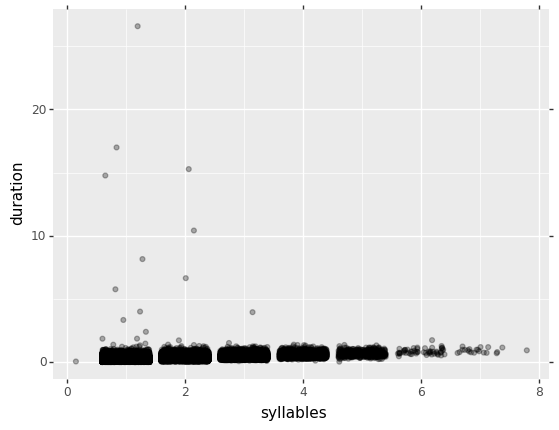

<ggplot: (8752495344345)>

In [156]:
#35.2s on sidious
ggplot(bwr_filtered_df, aes(x='syllables', y='duration')) + geom_jitter(alpha=0.3, height=None)

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 48578 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


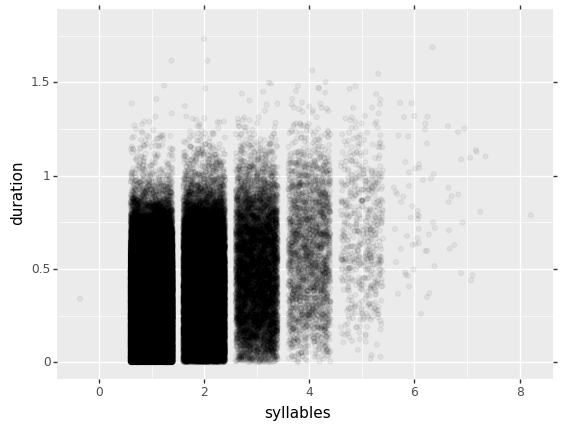

<ggplot: (8752486133693)>

In [157]:
ggplot(bwr_filtered_df, aes(x='syllables', y='duration')) + geom_jitter(alpha=0.05, height=None) + ylim(0,1.8)

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


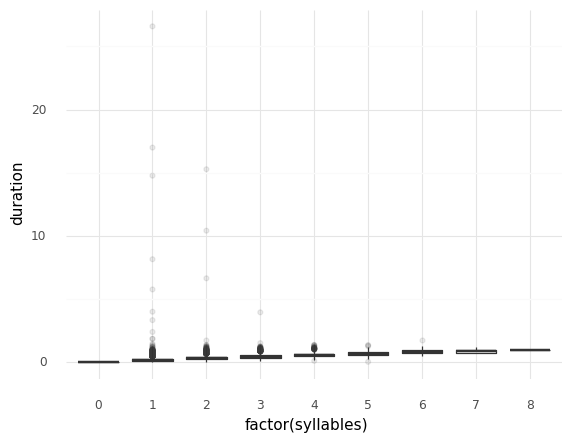

<ggplot: (8752469283665)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 14 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-p

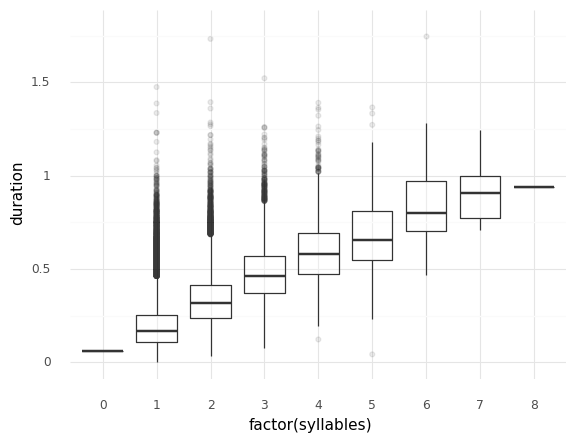

<ggplot: (8752469495397)>

In [158]:
ggplot(bwr_filtered_df, aes(x='factor(syllables)', y='duration')) + geom_boxplot(alpha=0.3, outlier_alpha=0.1) + theme_minimal()
ggplot(bwr_filtered_df, aes(x='factor(syllables)', y='duration')) + geom_boxplot(alpha=0.3, outlier_alpha=0.1) + ylim(0,1.8) + theme_minimal()

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


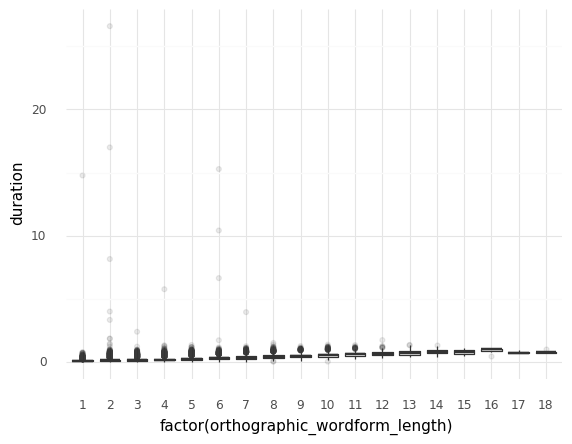

<ggplot: (8752471032257)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 14 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be rem

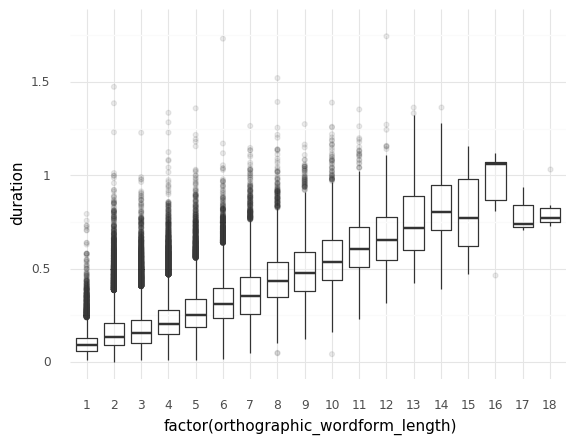

<ggplot: (8752471037105)>

In [159]:
ggplot(bwr_filtered_df, aes(x='factor(orthographic_wordform_length)', y='duration')) + geom_boxplot(alpha=0.3, outlier_alpha=0.1) + theme_minimal()
ggplot(bwr_filtered_df, aes(x='factor(orthographic_wordform_length)', y='duration')) + geom_boxplot(alpha=0.3, outlier_alpha=0.1) + ylim(0,1.8) + theme_minimal()

In [160]:
bwr_filtered_df_groupped = bwr_filtered_df.groupby(['orthographic_wordform'])
bwr_filtered_df_groupped_agged = bwr_filtered_df_groupped.agg(mean_dur=pd.NamedAgg(column='duration', aggfunc='mean'),
                                                              var_dur=pd.NamedAgg(column='duration', aggfunc='var'),
                                                              std_dur=pd.NamedAgg(column='duration', aggfunc='std'))
bwr_filtered_df_groupped_agged = bwr_filtered_df_groupped_agged.reset_index()
bwr_filtered_df_groupped_agged['2𝛔'] = 2 * bwr_filtered_df_groupped_agged['std_dur']
bwr_filtered_df_groupped_agged['2.5𝛔'] = 2.5 * bwr_filtered_df_groupped_agged['std_dur']
bwr_filtered_df_groupped_agged['3𝛔'] = 3 * bwr_filtered_df_groupped_agged['std_dur']
bwr_filtered_df_groupped_agged.head()
bwr_filtered_df_groupped_agged.tail()

,orthographic_wordform,mean_dur,var_dur,std_dur,2𝛔,2.5𝛔,3𝛔
0,'em,0.172884,NaN,NaN,NaN,NaN,NaN
1,a,0.070827,0.002790,0.052824,0.105648,0.132060,0.158472
2,a's,0.397900,0.018302,0.135286,0.270572,0.338215,0.405858
3,aaron's,0.330000,NaN,NaN,NaN,NaN,NaN
4,abandoned,0.473620,NaN,NaN,NaN,NaN,NaN


,orthographic_wordform,mean_dur,var_dur,std_dur,2𝛔,2.5𝛔,3𝛔
7993,zombied,0.447640,NaN,NaN,NaN,NaN,NaN
7994,zone,0.277500,0.002964,0.054447,0.108894,0.136118,0.163342
7995,zone's,0.335452,NaN,NaN,NaN,NaN,NaN
7996,zoo,0.400541,0.018632,0.136500,0.273000,0.341251,0.409501
7997,zoom,0.318500,0.002812,0.053033,0.106066,0.132583,0.159099


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


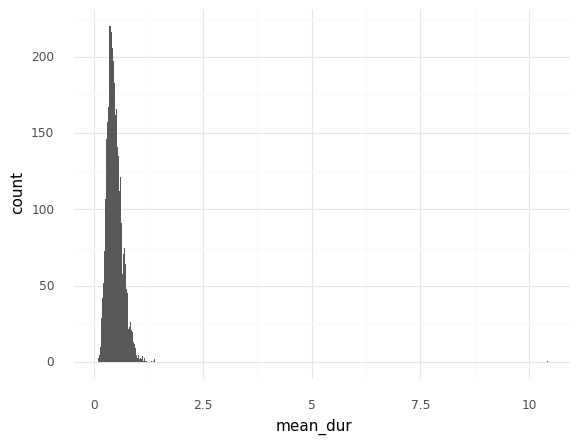

<ggplot: (8752460614681)>

In [161]:
ggplot(bwr_filtered_df_groupped_agged, aes(x='mean_dur')) + geom_histogram(binwidth=0.01) + theme_minimal()

In [162]:
bwr_filtered_df_agg_info = bwr_filtered_df_groupped_agged.to_dict()
set(bwr_filtered_df_agg_info.keys())
len(bwr_filtered_df_agg_info['orthographic_wordform'])

{'2.5𝛔', '2𝛔', '3𝛔', 'mean_dur', 'orthographic_wordform', 'std_dur', 'var_dur'}

7998

In [163]:
num_rows = len(bwr_filtered_df_agg_info['orthographic_wordform'])
bwr_filtered_agg_info = [{k:bwr_filtered_df_agg_info[k][r]
                          for k in ('orthographic_wordform', 'mean_dur', 'var_dur', 'std_dur', '2𝛔', '2.5𝛔', '3𝛔')}
                         for r in range(num_rows)]
bwr_filtered_agg_info[55]

{'orthographic_wordform': 'account',
 'mean_dur': 0.42474099999999454,
 'var_dur': 0.004521937164000969,
 'std_dur': 0.0672453505009898,
 '2𝛔': 0.1344907010019796,
 '2.5𝛔': 0.1681133762524745,
 '3𝛔': 0.20173605150296942}

In [164]:
buckeye_word_duration_info_fn = 'buckeye_word_duration_info.json'

buckeye_word_duration_info_path = os.path.join(repo_dir, buckeye_word_duration_info_fn)

with open(buckeye_word_duration_info_path, 'w', encoding='utf8') as json_file:
    json.dump(bwr_filtered_agg_info, json_file, indent=1, ensure_ascii=False, sort_keys=False)

# Applying exclusion criteria to the word relation

In [165]:
buckeye_word_relation[123]

{'orthographic_wordform': 'of',
 'orthographic_wordform_length': 2,
 'preceding_4_wordforms': 'in terms of <rem>',
 'preceding_3_wordforms': 'terms of <rem>',
 'preceding_2_wordforms': 'of <rem>',
 'preceding_1_wordforms': '<rem>',
 'following_1_wordforms': '<s>',
 'following_2_wordforms': '<s>',
 'following_3_wordforms': '<s>',
 'following_4_wordforms': '<s>',
 'preceding_wordforms': "<s> it's <rem> it's changed a lot since i've been here yknow i mean it's really come a long way in terms of <rem>",
 'following_wordforms': '<s>',
 'bidirectional_context': ("<s> it's <rem> it's changed a lot since i've been here yknow i mean it's really come a long way in terms of <rem>",
  '<s>'),
 'POS': 'IN',
 'isAdj': False,
 'isAdv': False,
 'isN': False,
 'isV': False,
 'phonemes': 'ʌ.v',
 'phones': 'ʌ.v',
 'phonemes_length': 2,
 'phones_length': 2,
 'hasSyllabicSegsInPhones': True,
 'hasAdjacentPauseOrDisfluency': True,
 'hasAdjacentFilledPause': False,
 'hasClitic': False,
 'syllables': 1,
 'beg

In [166]:
def exclusionRationale(bwr):
    #is function word or special content word = is not content word
    #adjecent to disfluency, pause, filled pause
    #utterance initial or utterance final
    #cliticized
    #utterance speech rate is 2.5/3x away from speaker's mean
    #word token duration is 2.5/3x away from word type's mean
    #no vowels or syllabic consonants in close phonetic transcription
    #speaker35
    exclusionCriteria = {'isNotContentWord':isNotContentWord,
                         'isAdjacentToDisfluencyPauseOrFilledPause':isAdjacentToDisfluencyPauseOrFilledPause,
                         'isUtteranceInitialOrFinal':isUtteranceInitialOrFinal,
                         'isCliticized':isCliticized,
                         'hasNoSyllabicSegs':hasNoSyllabicSegs,
                         'isSpeaker35':isSpeaker35,
                         'hasExtremeUtteranceSpeechRate':hasExtremeUtteranceSpeechRate#,
#                          'hasExtremeWordDuration':hasExtremeWordDuration
                        }
    exclusionReasons = {criterion:exclusionCriteria[criterion](bwr)
                        for criterion in exclusionCriteria}
    return exclusionReasons

def exclude(bwr):
    #is function word or special content word = is not content word
    #adjacent to disfluency, pause, filled pause
    #utterance initial or utterance final
    #cliticized
    #utterance speech rate is 2.5/3x away from speaker's mean
    #word token duration is 2.5/3x away from word type's mean
    #no vowels or syllabic consonants in close phonetic transcription
    #speaker35
    exclusionCriteria = (isNotContentWord,
                         isAdjacentToDisfluencyPauseOrFilledPause,
                         isUtteranceInitialOrFinal,
                         isCliticized,
                         hasNoSyllabicSegs,
                         isSpeaker35,
                         hasExtremeUtteranceSpeechRate#,
#                          hasExtremeWordDuration
                        )
    excludable = any(map(lambda f: f(bwr),
                         exclusionCriteria))
    return excludable

#Seyfarth (2014) counted a word as a content word (p.c.) iff it both 
# - had one of these Penn Treebank POS tags
# - wasn't in the list of excluded wordforms
seyfarth_content_tags = {
    'JJ',
    'JJR',
    'JJS',
    'NN',
    'NNS',
    'VB',
    'VBD',
    'VBG',
    'VBN',
    'VBP',
    'VBZ',
    'RB',
    'RBR',
    'RBS'
}
seyfarth_excluded_wordforms = {
    "be", "am", "are", "is", "let's", "aren't", "isn't", "ain't", "was", "wasn't", "were", "weren't", "been",
    "i", "me", "you", "it", "he", "him", "she", "her", "we", "us", "they",
    "mine", "yours", "its", "his", "hers", "ours",
    "do", "did", "don't", "didn't", "has", "have", "had", "hasn't", "haven't", "hadn't", "would've", "could've", "should've", "got", "gotten", "get", "gets", "getting", "used", "about", "going", "will", "how", "how's", "how'd", "what's", "what'd", "who've",
    "this", "that", "this'll", "that'll", "this'd", "that'd",
    "here", "there", "here's", "there's", "here're", "there're", "here'd", "there'd", "here'll", "there'll",
    "now", "then", "again", "ever",
    "too", "also", "ago", "yet", "just", "if", "else", "else's",
    "as",
    "therefore", "whatsoever", "anyway", "however", "whenever", "whatever", "whoever", "whichever",
    "not",
    "even", "any", "all",
    "kind", "sort",
    "pretty", "lot", "lotta",
    "so",
    "really", "very",
    "yes", "ya", "yeah", "yep", "no", "nah",
    "maybe",
    "okay", "alright",
    "oh",
    "like", "mean", "well", "right",
    "hey",
    "know",
    "wow", "gee", "heck", "hell", "darn", "damn", "shit",
    
    #number words
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred", "thousand", "million", "billion",
    "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth", "eleventh", "twelfth", "thirteenth", "fourteenth", "fifteenth", "sixteenth", "seventeenth", "eighteenth", "nineteenth", "twentieth", "thirtieth", "fourtieth", "fiftieth", "sixtieth", "seventieth", "eightieth", "ninetieth", "hundredth", "thousandth", "millionth", "billionth",
    
    #mistagged
    "new", "york", "jersey", "mexico", "merrill", "lynch", "new", "united", "states", "saint", "springer", "spears", "brad", "pitt", "george", "bush", "rodney", "king", "super", "bowl", "nerf", "fort", "lauderdale", "virgin", "islands", "daytona", "beach", "bible", "ivy", "league", "african", "american", "north", "carolina", "south", "dakota", "west", "virginia", "sesame", "street", "york", "city", "salvation", "army", "witnesses", "taco", "bell", "sears", "cape", "cod", "maltese", "falcon", "los", "las", "el", "al", "hong", "mount", "supreme", "court", "vice", "versa", "republican", "party", "mutant", "ninja", "roman", "empire", "non", "multi", "et", "cetera", "hors", "d'oeuvres", 
    "blah", "yadda", "ding", "da",
    "hi",
    "gung", "ho",
    "up", "ex", "in", "about", "out", "by", "ifs", "if", "of", "off", "on",
    "a", "b", "c", "d", "k", "o", "s", "t", "u", "y",
    "tv",
    "capita",
    "and", "because", "can", "for", "into", "with", "around", "over", "than", "before", "though"
}

def isNotContentWord(bwr):
    return not isContentWord(bwr)

def isContentWord(bwr):
    return bwr['POS'] in seyfarth_content_tags and not bwr['orthographic_wordform'] in seyfarth_excluded_wordforms

def isAdjacentToDisfluencyPauseOrFilledPause(bwr):
    return bwr['hasAdjacentFilledPause'] or bwr['hasAdjacentPauseOrDisfluency']

def isUtteranceInitialOrFinal(bwr):
    return bwr['dist_from_left_edge'] == 0 or bwr['dist_from_right_edge'] ==0

def isCliticized(bwr):
    return bwr['hasClitic']

def hasNoSyllabicSegs(bwr):
    return not bwr['hasSyllabicSegsInPhones']

def isSpeaker35(bwr):
    return bwr['speaker_name'] == 's35'

def hasExtremeUtteranceSpeechRate(bwr, boundary='3'):
    sr = bwr['speech_rate']
    my_speech_rate_info = [r for r in speech_rate_info 
                           if r['speaker_name'] == bwr['speaker_name']][0]
    speaker_mean = my_speech_rate_info['mean_sr']
    
    ub25 = speaker_mean + my_speech_rate_info['2.5𝛔']
    lb25 = speaker_mean - my_speech_rate_info['2.5𝛔']
    
    ub3 = speaker_mean + my_speech_rate_info['3𝛔']
    lb3 = speaker_mean - my_speech_rate_info['3𝛔']
    
    if boundary == '2.5':
        return not (lb25 < sr < ub25)
    elif boundary == '3':
        return not (lb3 < sr < ub3)
    else:
        raise Exception(f"boundary must be one of '2.5' or '3', got {boundary} instead.")

def hasExtremeWordDuration(bwr, boundary='3'):
    dur = bwr['duration']
    my_word_info = [r for r in bwr_filtered_agg_info
                    if r['orthographic_wordform'] == bwr['orthographic_wordform']][0]
    word_mean = my_word_info['mean_dur']
    
    ub25 = word_mean + my_word_info['2.5𝛔']
    lb25 = word_mean - my_word_info['2.5𝛔']
    
    ub3 = word_mean + my_word_info['3𝛔']
    lb3 = word_mean - my_word_info['3𝛔']
    
    if boundary == '2.5':
        return not (lb25 < dur < ub25)
    elif boundary == '3':
        return not (lb3 < dur < ub3)
    else:
        raise Exception(f"boundary must be one of '2.5' or '3', got {boundary} instead.")

In [167]:
len(buckeye_word_relation)

216062

In [168]:
from itertools import filterfalse

In [169]:
#54.2s on sidious
filtered_buckeye_word_relation = list(filterfalse(exclude, buckeye_word_relation))
len(filtered_buckeye_word_relation) #42025 w/ 3.0 std dev boundaries
len(filtered_buckeye_word_relation) / len(buckeye_word_relation) #0.195 w/ 3.0 std dev boundaries
len(buckeye_word_relation) - len(filtered_buckeye_word_relation) #63836 w/ 3.0 std dev boundaries

44127

0.20423304421878904

171935

In [192]:
extract_padded_utterance_speech = lambda bwr: ' '.join([bwr['preceding_wordforms'], bwr['orthographic_wordform'], bwr['following_wordforms']])
remove_padding = lambda padded_utt: padded_utt[len(BOS)+1:-(len(EOS)+1)]
extract_utterance_speech = lambda bwr: remove_padding(extract_padded_utterance_speech(bwr))

filtered_buckeye_utterances = {extract_utterance_speech(bwr) for bwr in filtered_buckeye_word_relation}
len(filtered_buckeye_utterances)
list(filtered_buckeye_utterances)[:3]
filtered_buckeye_utterances_alpha = tuple(sorted(filtered_buckeye_utterances))
filtered_buckeye_utterances_alpha[:3]

buckeye_full_vocabulary_filtered = set(funcy.lcat([utt.split(' ') 
                                                   for utt in filtered_buckeye_utterances]))
len(buckeye_full_vocabulary_filtered)
list(buckeye_full_vocabulary_filtered)[:3]
buckeye_full_vocabulary_filtered_alpha = tuple(sorted(buckeye_full_vocabulary_filtered))
buckeye_full_vocabulary_filtered_alpha[:3]

11003

["it goes out and extracts data analyzes what's there",
 'he also knew not to touch them',
 'my victim that i was so close to me would want me to do <rem> yknow']

('a <rem> a great advocate of uh of old woody yknow so he probably learnt quite a bit from the old general yknow',
 'a <rem> four hundred dollar dress and a three hundred dollar hair do and',
 "a <rem> i think it was a drug to calm him down so he's not so hyper")

7539

['publicizing', 'electronic', 'deck']

("'em", '<rem>', 'a')

In [193]:
filtered_orth_words = set(map(lambda bwr: bwr['orthographic_wordform'],
                              filtered_buckeye_word_relation))
len(orth_words) #7998
len(filtered_orth_words) #3695 w/ 3.0 std dev boundaries
len(filtered_orth_words) / len(orth_words) #0.46 w/ 3.0 std dev boundaries
len(orth_words) - len(filtered_orth_words) #4303 w/ 3.0 std dev boundaries

buckeye_target_vocabulary_filtered = filtered_orth_words
buckeye_target_vocabulary_filtered_alpha = tuple(sorted(buckeye_target_vocabulary_filtered))

7998

5610

0.7014253563390848

2388

In [194]:
#4m11s on sidious
# exclusion_rationales = list(map(exclusionRationale, buckeye_word_relation))

#old: 38s on sidious
#new: 5s on sidious
exclusion_rationales = Parallel(n_jobs=-1, backend='multiprocessing',verbose=10)(delayed(exclusionRationale)(bwr)
                                for bwr in buckeye_word_relation)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0100s.) Setting batch_size=40.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0897s.) Setting batch_size=178.
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 7786 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 11524 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 15618 tasks      | elapsed:

In [195]:
exclusion_rationales_df = pd.DataFrame(exclusion_rationales)
exclusion_rationales_df.info()
exclusion_rationales_df.head()
exclusion_rationales_df_info = exclusion_rationales_df.to_dict()
exclusion_count = {criterion:Counter(exclusion_rationales_df_info[criterion].values())[True]
                   for criterion in exclusion_rationales_df_info.keys()}
exclusion_count

#w/ 3.0 std dev boundaries
# {'isNotContentWord': 151856,
#  'isAdjacentToDisfluencyPauseOrFilledPause': 37993,
#  'isUtteranceInitialOrFinal': 34285,
#  'isCliticized': 15546,
#  'hasNoSyllabicSegs': 1758,
#  'isSpeaker35': 8776,
#  'hasExtremeUtteranceSpeechRate': 294,
#  'hasExtremeWordDuration': 6225}

#w/ 2.5 std dev boundaries
# {'isNotContentWord': 151856,
#  'isAdjacentToDisfluencyPauseOrFilledPause': 37993,
#  'isUtteranceInitialOrFinal': 34285,
#  'isCliticized': 15546,
#  'hasNoSyllabicSegs': 1758,
#  'isSpeaker35': 8776,
#  'hasExtremeUtteranceSpeechRate': 751,
#  'hasExtremeWordDuration': 8316}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216062 entries, 0 to 216061
Data columns (total 7 columns):
isNotContentWord                            216062 non-null bool
isAdjacentToDisfluencyPauseOrFilledPause    216062 non-null bool
isUtteranceInitialOrFinal                   216062 non-null bool
isCliticized                                216062 non-null bool
hasNoSyllabicSegs                           216062 non-null bool
isSpeaker35                                 216062 non-null bool
hasExtremeUtteranceSpeechRate               216062 non-null bool
dtypes: bool(7)
memory usage: 1.4 MB


,isNotContentWord,isAdjacentToDisfluencyPauseOrFilledPause,isUtteranceInitialOrFinal,isCliticized,hasNoSyllabicSegs,isSpeaker35,hasExtremeUtteranceSpeechRate
0,True,True,True,False,False,False,False
1,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,True,False,False,False,False


{'isNotContentWord': 151856,
 'isAdjacentToDisfluencyPauseOrFilledPause': 37993,
 'isUtteranceInitialOrFinal': 34285,
 'isCliticized': 15546,
 'hasNoSyllabicSegs': 1758,
 'isSpeaker35': 8776,
 'hasExtremeUtteranceSpeechRate': 294}

In [196]:
#calculate frequencies over word types

In [197]:
non_excluded_orthographic_wf_tokens30 = list(map(lambda bwr: bwr['orthographic_wordform'],
                                                 filtered_buckeye_word_relation))
non_excluded_orthographic_wf_tokens30_count = Counter(non_excluded_orthographic_wf_tokens30)
non_excluded_orthographic_wf_tokens30_count.most_common(10)

[('think', 1075),
 ('people', 692),
 ('go', 685),
 ('more', 453),
 ('things', 379),
 ('something', 378),
 ('said', 348),
 ('time', 331),
 ('say', 326),
 ('want', 324)]

In [198]:
non_excluded_orthographic_wf_tokens30_count.most_common()

[('think', 1075),
 ('people', 692),
 ('go', 685),
 ('more', 453),
 ('things', 379),
 ('something', 378),
 ('said', 348),
 ('time', 331),
 ('say', 326),
 ('want', 324),
 ('kids', 313),
 ('school', 312),
 ('see', 304),
 ('thing', 292),
 ('back', 290),
 ('much', 280),
 ('other', 279),
 ('went', 264),
 ('little', 257),
 ('good', 248),
 ('stuff', 242),
 ('always', 234),
 ('way', 232),
 ('doing', 218),
 ('work', 212),
 ('years', 211),
 ('take', 203),
 ('different', 202),
 ('everything', 198),
 ('come', 196),
 ('make', 188),
 ('still', 175),
 ('never', 167),
 ('need', 166),
 ('real', 164),
 ('high', 149),
 ('big', 148),
 ('anything', 148),
 ('same', 145),
 ('probably', 144),
 ('put', 143),
 ('only', 141),
 ('being', 137),
 ('home', 137),
 ('look', 136),
 ('live', 130),
 ('talk', 128),
 ('year', 124),
 ('actually', 120),
 ('whole', 118),
 ('down', 117),
 ('feel', 115),
 ('parents', 114),
 ('many', 114),
 ('day', 112),
 ('money', 110),
 ('tell', 110),
 ('thought', 107),
 ('house', 105),
 ('done

[(1, 2654),
 (2, 884),
 (3, 455),
 (4, 294),
 (5, 178),
 (6, 145),
 (7, 112),
 (8, 76),
 (9, 70),
 (10, 61)]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


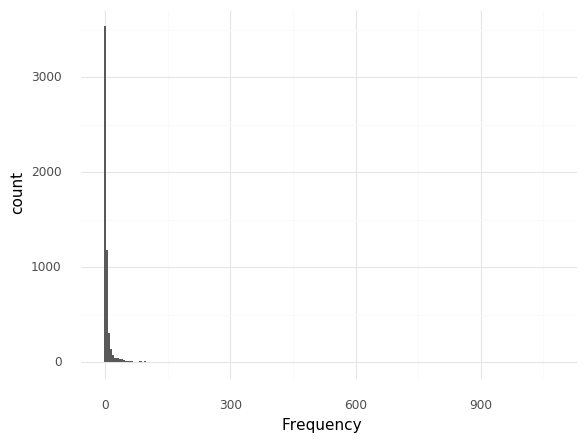

<ggplot: (8752473700977)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 35 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not

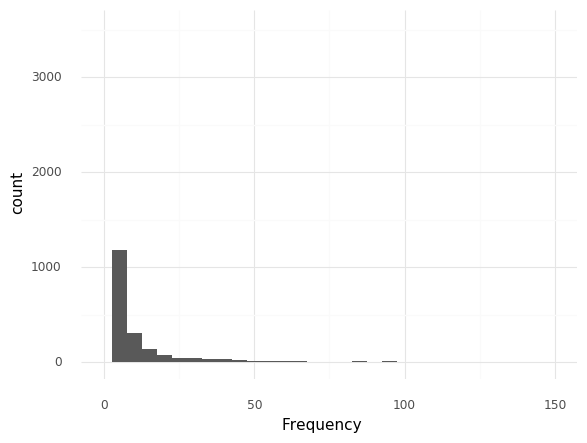

<ggplot: (8752419491889)>

In [199]:
non_excluded_orthographic_wf_tokens30_counts = list(non_excluded_orthographic_wf_tokens30_count.values())

freq_dist_over_counts30 = Counter(non_excluded_orthographic_wf_tokens30_counts)
freq_dist_over_counts30.most_common(10)
#there are 884 words with a count of 2
#there are 739 words with a count of 1
#there are 455 words with a count of 3...

# freq_dist_over_counts30_dl = [{'Frequency':f, 'Count':c} for f,c in freq_dist_over_counts30.items()]
# freq_dist_over_counts30_df = pd.DataFrame(freq_dist_over_counts30_dl)
non_excluded_orthographic_wf_tokens30_counts_df = pd.DataFrame([{'Frequency':f} for f in non_excluded_orthographic_wf_tokens30_counts])

ggplot(non_excluded_orthographic_wf_tokens30_counts_df, aes(x='Frequency')) + geom_histogram(binwidth=5) + theme_minimal()
ggplot(non_excluded_orthographic_wf_tokens30_counts_df, aes(x='Frequency')) + geom_histogram(binwidth=5) + theme_minimal() + xlim(0,150)

In [200]:
freq_dist_over_counts30.most_common()

[(1, 2654),
 (2, 884),
 (3, 455),
 (4, 294),
 (5, 178),
 (6, 145),
 (7, 112),
 (8, 76),
 (9, 70),
 (10, 61),
 (11, 58),
 (12, 39),
 (14, 35),
 (15, 34),
 (13, 33),
 (16, 25),
 (18, 19),
 (28, 19),
 (19, 17),
 (20, 17),
 (17, 17),
 (21, 16),
 (22, 13),
 (39, 13),
 (23, 11),
 (24, 11),
 (25, 11),
 (35, 9),
 (30, 9),
 (32, 9),
 (33, 8),
 (26, 8),
 (42, 8),
 (29, 7),
 (44, 7),
 (45, 7),
 (27, 7),
 (43, 6),
 (36, 6),
 (57, 6),
 (37, 6),
 (49, 6),
 (38, 6),
 (41, 5),
 (40, 5),
 (50, 5),
 (53, 4),
 (84, 4),
 (97, 4),
 (31, 4),
 (54, 4),
 (93, 3),
 (82, 3),
 (90, 3),
 (94, 3),
 (47, 3),
 (65, 3),
 (75, 3),
 (34, 3),
 (62, 3),
 (46, 3),
 (58, 3),
 (60, 3),
 (52, 3),
 (148, 2),
 (114, 2),
 (87, 2),
 (86, 2),
 (69, 2),
 (64, 2),
 (66, 2),
 (137, 2),
 (96, 2),
 (83, 2),
 (110, 2),
 (63, 2),
 (100, 2),
 (74, 2),
 (51, 2),
 (55, 2),
 (264, 1),
 (312, 1),
 (290, 1),
 (196, 1),
 (232, 1),
 (248, 1),
 (118, 1),
 (202, 1),
 (61, 1),
 (331, 1),
 (212, 1),
 (379, 1),
 (242, 1),
 (1075, 1),
 (292, 1),
 (28

In [201]:
non_excluded_orthographic_wf_tokens25 = list(map(lambda bwr: bwr['orthographic_wordform'],
                                                 filtered_buckeye_word_relation))
non_excluded_orthographic_wf_tokens25_count = Counter(non_excluded_orthographic_wf_tokens25)
non_excluded_orthographic_wf_tokens25_count.most_common(10)

[('think', 1075),
 ('people', 692),
 ('go', 685),
 ('more', 453),
 ('things', 379),
 ('something', 378),
 ('said', 348),
 ('time', 331),
 ('say', 326),
 ('want', 324)]

[(1, 2654),
 (2, 884),
 (3, 455),
 (4, 294),
 (5, 178),
 (6, 145),
 (7, 112),
 (8, 76),
 (9, 70),
 (10, 61)]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


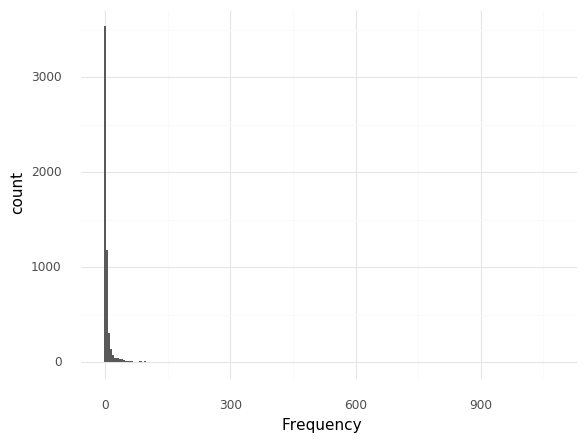

<ggplot: (8752408209281)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 35 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not

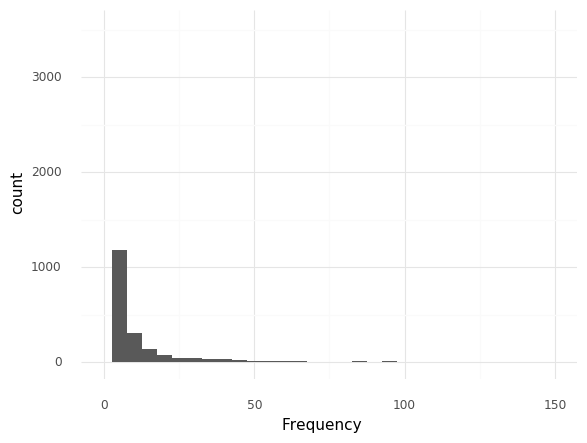

<ggplot: (8752400898657)>

In [202]:
non_excluded_orthographic_wf_tokens25_counts = list(non_excluded_orthographic_wf_tokens25_count.values())

freq_dist_over_counts25 = Counter(non_excluded_orthographic_wf_tokens25_counts)
freq_dist_over_counts25.most_common(10)
#there are 883 words with a count of 2
#there are 739 words with a count of 1
#there are 457 words with a count of 3...

# freq_dist_over_counts25_dl = [{'Frequency':f, 'Count':c} for f,c in freq_dist_over_counts30.items()]
# freq_dist_over_counts25_df = pd.DataFrame(freq_dist_over_counts30_dl)
non_excluded_orthographic_wf_tokens25_counts_df = pd.DataFrame([{'Frequency':f} for f in non_excluded_orthographic_wf_tokens25_counts])

ggplot(non_excluded_orthographic_wf_tokens25_counts_df, aes(x='Frequency')) + geom_histogram(binwidth=5) + theme_minimal()
ggplot(non_excluded_orthographic_wf_tokens25_counts_df, aes(x='Frequency')) + geom_histogram(binwidth=5) + theme_minimal() + xlim(0,150)

## Write to file...

Now we want to write to file 
 - the word relation for word tokens that were not excluded

plus the 
 - orthographic wordforms
 - 2-gram contexts (left separate from right)
 - 3-gram contexts (left separate from right)
 - 4-gram contexts (left separate from right)
 - 2-,3-, and 4-gram contexts altogether (left separate from right)
 - bidirectional contexts
 - full orthographic vocabulary across all contexts and unexcluded word tokens

associated with word tokens that were not excluded.

In [203]:
filtered_buckeye_word_relation[:3]

[{'orthographic_wordform': 'set',
  'orthographic_wordform_length': 3,
  'preceding_4_wordforms': '<rem> i since i',
  'preceding_3_wordforms': 'i since i',
  'preceding_2_wordforms': 'since i',
  'preceding_1_wordforms': 'i',
  'following_1_wordforms': 'it',
  'following_2_wordforms': "it it's",
  'following_3_wordforms': "it it's okay",
  'following_4_wordforms': "it it's okay <s>",
  'preceding_wordforms': '<s> because it slipped <rem> i since i',
  'following_wordforms': "it it's okay <s>",
  'bidirectional_context': ('<s> because it slipped <rem> i since i',
   "it it's okay <s>"),
  'POS': 'VBD',
  'isAdj': False,
  'isAdv': False,
  'isN': False,
  'isV': True,
  'phonemes': 's.ɛ.t',
  'phones': 's.ɛ.ɾ',
  'phonemes_length': 3,
  'phones_length': 3,
  'hasSyllabicSegsInPhones': True,
  'hasAdjacentPauseOrDisfluency': False,
  'hasAdjacentFilledPause': False,
  'hasClitic': False,
  'syllables': 1,
  'beg': 45.022068,
  'end': 45.243621,
  'duration': 0.2215530000000001,
  'misal

In [204]:
filtered_buckeye_word_analysis_relation_fn = 'buckeye_word_analysis_relation_filtered.json'

filtered_buckeye_word_analysis_relation_path = os.path.join(repo_dir, filtered_buckeye_word_analysis_relation_fn)

with open(filtered_buckeye_word_analysis_relation_path, 'w', encoding='utf8') as json_file:
    json.dump(filtered_buckeye_word_relation, json_file, indent=1, ensure_ascii=False, sort_keys=False)

In [205]:
!cat -n buckeye_word_analysis_relation_filtered.json | head -100

     1	[
     2	 {
     3	  "orthographic_wordform": "set",
     4	  "orthographic_wordform_length": 3,
     5	  "preceding_4_wordforms": "<rem> i since i",
     6	  "preceding_3_wordforms": "i since i",
     7	  "preceding_2_wordforms": "since i",
     8	  "preceding_1_wordforms": "i",
     9	  "following_1_wordforms": "it",
    10	  "following_2_wordforms": "it it's",
    11	  "following_3_wordforms": "it it's okay",
    12	  "following_4_wordforms": "it it's okay <s>",
    13	  "preceding_wordforms": "<s> because it slipped <rem> i since i",
    14	  "following_wordforms": "it it's okay <s>",
    15	  "bidirectional_context": [
    16	   "<s> because it slipped <rem> i since i",
    17	   "it it's okay <s>"
    18	  ],
    19	  "POS": "VBD",
    20	  "isAdj": false,
    21	  "isAdv": false,
    22	  "isN": false,
    23	  "isV": true,
    24	  "phonemes": "s.ɛ.t",
    25	  "phones": "s.ɛ.ɾ",
    26	  "phonemes_length": 3,
    27	  "phones_length": 3,
    28	  "hasSyllabicSegsInPhone

In [206]:
buckeye_target_vocabulary_filtered_alpha[:5]

('abercrombie', 'abhorrent', 'abide', 'ability', 'able')

In [207]:
filtered_buckeye_target_vocabulary_fn = 'buckeye_target_vocabulary_filtered.txt'
filtered_buckeye_target_vocabulary_path = os.path.join(repo_dir, filtered_buckeye_target_vocabulary_fn)

with open(filtered_buckeye_target_vocabulary_path, 'w') as file:
    vocab_w_linebreaks = list(map(lambda l: l + "\n", buckeye_target_vocabulary_filtered_alpha))
    file.writelines(vocab_w_linebreaks)

In [208]:
!cat -n buckeye_target_vocabulary_filtered.txt | head -10

     1	abercrombie
     2	abhorrent
     3	abide
     4	ability
     5	able
     6	abortion
     7	abortions
     8	above
     9	abroad
    10	abrupt
cat: write error: Broken pipe


In [209]:
filtered_buckeye_utterances_alpha[:5]

('a <rem> a great advocate of uh of old woody yknow so he probably learnt quite a bit from the old general yknow',
 'a <rem> four hundred dollar dress and a three hundred dollar hair do and',
 "a <rem> i think it was a drug to calm him down so he's not so hyper",
 'a <rem> school or something and said <rem> we wanna <rem> help we wanna teach a class <rem> or we wanna clean or anything <rem> they would probably say yknow they might think it was kind of weird but they',
 "a <rem> that you know might wanna save up for something when he's twelve years old has no chance at all getting a job")

In [210]:
filtered_buckeye_utterances_fn = 'buckeye_utterances_filtered.txt'
filtered_buckeye_utterances_path = os.path.join(repo_dir, filtered_buckeye_utterances_fn)

with open(filtered_buckeye_utterances_path, 'w') as file:
    utterances_w_linebreaks = list(map(lambda l: l + "\n", filtered_buckeye_utterances_alpha))
    file.writelines(utterances_w_linebreaks)

In [211]:
!cat -n buckeye_utterances_filtered.txt | head -10

     1	a <rem> a great advocate of uh of old woody yknow so he probably learnt quite a bit from the old general yknow
     2	a <rem> four hundred dollar dress and a three hundred dollar hair do and
     3	a <rem> i think it was a drug to calm him down so he's not so hyper
     4	a <rem> school or something and said <rem> we wanna <rem> help we wanna teach a class <rem> or we wanna clean or anything <rem> they would probably say yknow they might think it was kind of weird but they
     5	a <rem> that you know might wanna save up for something when he's twelve years old has no chance at all getting a job
     6	a bar right behind where we lived and i lived in taylor so it's this it's it's in a t shape and then the side of the building all the sound just rolls right up the wall
     7	a big mix of people and everyone's doing their own thing
     8	a black woman who is <rem> very well qualified for a job <rem> and a white male is <rem> equally qualified for the job the black woman should g

In [212]:
buckeye_full_vocabulary_filtered_alpha[:5]

("'em", '<rem>', 'a', "a's", "aaron's")

In [213]:
filtered_buckeye_full_vocabulary_fn = 'buckeye_full_vocabulary_filtered.txt'
filtered_buckeye_full_vocabulary_path = os.path.join(repo_dir, filtered_buckeye_full_vocabulary_fn)

with open(filtered_buckeye_full_vocabulary_path, 'w') as file:
    vocab_w_linebreaks = list(map(lambda l: l + "\n", buckeye_full_vocabulary_filtered_alpha))
    file.writelines(vocab_w_linebreaks)

In [214]:
!cat -n buckeye_full_vocabulary_filtered.txt | head -10

     1	'em
     2	<rem>
     3	a
     4	a's
     5	aaron's
     6	abandoned
     7	abercrombie
     8	abhorrent
     9	abide
    10	ability
cat: write error: Broken pipe


### One sided n-gram contexts

In [215]:
len(words)

236902

In [216]:
contexts = {'preceding':{'1':{'unfiltered':None, 'filtered':None},
                         '2':{'unfiltered':None, 'filtered':None},
                         '3':{'unfiltered':None, 'filtered':None},
                         '4':{'unfiltered':None, 'filtered':None}},
            'following':{'1':{'unfiltered':None, 'filtered':None},
                         '2':{'unfiltered':None, 'filtered':None},
                         '3':{'unfiltered':None, 'filtered':None},
                         '4':{'unfiltered':None, 'filtered':None}}}
all_contexts = {'preceding':{'unfiltered':[], 'filtered':[]},
                'following':{'unfiltered':[], 'filtered':[]}}

for direction in ('preceding', 'following'):
    for m in ('1','2','3','4'):
        field_str = '_'.join([direction, m, 'wordforms'])
        contexts_unfiltered = sorted(list({r[field_str] for r in buckeye_word_relation}))
        contexts_filtered = sorted(list({r[field_str] for r in filtered_buckeye_word_relation}))
        
        print("Unfiltered size of {0} = {1:,}".format(field_str, len(contexts_unfiltered)))
        print("  Filtered size of {0} = {1:,}".format(field_str, len(contexts_filtered)))
        print(' ')
        #Note that for each m, the number is the number of unique *strings* in the associated field.
        # That means that there are strings in the "preceding_3_wordforms" field 
        # that have strictly less than 3 wordforms in them.
        
        contexts[direction][m]['unfiltered'] = contexts_unfiltered
        contexts[direction][m]['filtered'] = contexts_filtered
        
        all_contexts[direction]['unfiltered'].append(contexts_unfiltered)
        all_contexts[direction]['filtered'].append(contexts_filtered)


print('-------')
for direction in ('preceding', 'following'):
    for subset in ('unfiltered', 'filtered'):
        us = len(  lcat( all_contexts[direction][subset] )  )
        consolidated = sorted(list(set(lcat( all_contexts[direction][subset] ))))
        cs = len(consolidated)
        print(f'Unconsolidated size of all {direction} {subset} contexts = {us}')
        print(f'  Consolidated size of all {direction} {subset} contexts = {cs}')
        print(' ')
        all_contexts[direction][subset] = consolidated

Unfiltered size of preceding_1_wordforms = 7,334
  Filtered size of preceding_1_wordforms = 2,764
 
Unfiltered size of preceding_2_wordforms = 60,553
  Filtered size of preceding_2_wordforms = 17,112
 
Unfiltered size of preceding_3_wordforms = 132,778
  Filtered size of preceding_3_wordforms = 33,442
 
Unfiltered size of preceding_4_wordforms = 164,002
  Filtered size of preceding_4_wordforms = 39,098
 
Unfiltered size of following_1_wordforms = 7,645
  Filtered size of following_1_wordforms = 3,306
 
Unfiltered size of following_2_wordforms = 64,036
  Filtered size of following_2_wordforms = 19,090
 
Unfiltered size of following_3_wordforms = 138,847
  Filtered size of following_3_wordforms = 34,674
 
Unfiltered size of following_4_wordforms = 169,854
  Filtered size of following_4_wordforms = 39,235
 
-------
Unconsolidated size of all preceding unfiltered contexts = 364667
  Consolidated size of all preceding unfiltered contexts = 356514
 
Unconsolidated size of all preceding filte

In [217]:
%%capture
#cell magic above suppresses useless output of file.write

#3m on sidious
for direction in ('preceding', 'following'):
    for m in ('1','2','3','4'):
        for subset in ('unfiltered', 'filtered'):
            my_contexts = contexts[direction][m][subset]
            fn = '_'.join(['buckeye', 'contexts', direction, m, subset]) + '.txt'
            fp = os.path.join(repo_dir, fn)
            
            with open(fp, 'w') as file:
                for c in my_contexts:
                    file.write("{0}\n".format(c));

In [218]:
%ls

 buckeye_contexts_bidirectional_filtered.json
 buckeye_contexts_bidirectional_unfiltered.json
 buckeye_contexts_following_1_filtered.txt
 buckeye_contexts_following_1_unfiltered.txt
 buckeye_contexts_following_2_filtered.txt
 buckeye_contexts_following_2_unfiltered.txt
 buckeye_contexts_following_3_filtered.txt
 buckeye_contexts_following_3_unfiltered.txt
 buckeye_contexts_following_4_filtered.txt
 buckeye_contexts_following_4_unfiltered.txt
 buckeye_contexts_preceding_1_filtered.txt
 buckeye_contexts_preceding_1_unfiltered.txt
 buckeye_contexts_preceding_2_filtered.txt
 buckeye_contexts_preceding_2_unfiltered.txt
 buckeye_contexts_preceding_3_filtered.txt
 buckeye_contexts_preceding_3_unfiltered.txt
 buckeye_contexts_preceding_4_filtered.txt
 buckeye_contexts_preceding_4_unfiltered.txt
 buckeye_full_vocabulary_filtered.txt
 buckeye_orthography_phonemic_transcription_relation.tsv
 buckeye_orthography_phones_transcription_relation.tsv
 buckeye_speaker_info.json
 buckeye_target_vocabular

### Bidirectional contexts

In [219]:
unfiltered_bd_contexts = [bwr['bidirectional_context'] for bwr in buckeye_word_relation]

filtered_bd_contexts = [bwr['bidirectional_context'] for bwr in filtered_buckeye_word_relation]

In [220]:
len(unfiltered_bd_contexts)
len(filtered_bd_contexts)

len(set(unfiltered_bd_contexts))
len(set(filtered_bd_contexts))

216062

44127

209798

44087

In [221]:
unfiltered_bd_contexts_alpha = sorted(list(set(unfiltered_bd_contexts)),
                                      key=lambda lr: lr[0] + lr[1])
len(unfiltered_bd_contexts_alpha)

filtered_bd_contexts_alpha = sorted(list(set(filtered_bd_contexts)),
                                    key=lambda lr: lr[0] + lr[1])
len(filtered_bd_contexts_alpha)

209798

44087

In [222]:
filtered_bd_contexts_alpha[:5]

[('<s> a <rem> a great advocate of uh of old woody yknow so he probably learnt quite a bit from the old',
  'yknow <s>'),
 ('<s> a <rem> a great advocate of uh of old woody yknow so he probably learnt quite a bit from the',
  'general yknow <s>'),
 ('<s> a <rem> a great advocate of uh of old woody yknow so he probably learnt quite a',
  'from the old general yknow <s>'),
 ('<s> a <rem> a great advocate of uh of old woody yknow so he probably learnt',
  'a bit from the old general yknow <s>'),
 ('<s> a <rem> a great advocate of uh of old woody yknow so he probably',
  'quite a bit from the old general yknow <s>')]

In [223]:
# %%capture
# #cell magic above suppresses useless output of file.write

for subset in ('unfiltered', 'filtered'):
    fn = '_'.join(['buckeye', 'contexts', 'bidirectional', subset]) + '.json'
    fp = os.path.join(repo_dir, fn)

    my_contexts = unfiltered_bd_contexts_alpha if subset == 'unfiltered' else filtered_bd_contexts_alpha
    
    with open(fp, 'w', encoding='utf8') as json_file:
        json.dump(my_contexts, json_file, indent=1, ensure_ascii=False)
    
#     with open(fp, 'w') as file:
#         for c in my_contexts:
#             file.write("{0}\n".format(c));

In [224]:
%ls

 buckeye_contexts_bidirectional_filtered.json
 buckeye_contexts_bidirectional_unfiltered.json
 buckeye_contexts_following_1_filtered.txt
 buckeye_contexts_following_1_unfiltered.txt
 buckeye_contexts_following_2_filtered.txt
 buckeye_contexts_following_2_unfiltered.txt
 buckeye_contexts_following_3_filtered.txt
 buckeye_contexts_following_3_unfiltered.txt
 buckeye_contexts_following_4_filtered.txt
 buckeye_contexts_following_4_unfiltered.txt
 buckeye_contexts_preceding_1_filtered.txt
 buckeye_contexts_preceding_1_unfiltered.txt
 buckeye_contexts_preceding_2_filtered.txt
 buckeye_contexts_preceding_2_unfiltered.txt
 buckeye_contexts_preceding_3_filtered.txt
 buckeye_contexts_preceding_3_unfiltered.txt
 buckeye_contexts_preceding_4_filtered.txt
 buckeye_contexts_preceding_4_unfiltered.txt
 buckeye_full_vocabulary_filtered.txt
 buckeye_orthography_phonemic_transcription_relation.tsv
 buckeye_orthography_phones_transcription_relation.tsv
 buckeye_speaker_info.json
 buckeye_target_vocabular